**<div align="center">MOSCOW STATE BUDGETARY EDUCATIONAL INSTITUTION</div>**
**<div align="center">FOR ADDITIONAL PROFESSIONAL EDUCATION</div>**
**<div align="center">CENTER FOR PROFESSIONAL QUALIFICATIONS AND EMPLOYMENT PROMOTION</div>**
**<div align="center">«PROFESSIONAL»</div>**
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <div align="center"> FINAL CERTIFICATION WORK </div>
<div align="center"> on </div>
<div align="center"> «Data analysis using Python» </div>
<div align="center"> (on the example of the task of determining the rating of wine) </div> 
<div align="center">by course participant Bantov Konstantin Dmitrievich<br>group № 472 </div>
 <div align="center">Professional retraining program </div>
<div align="center"> «Data analysis» </div>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <div align="center"> Moscow, 2022</div>

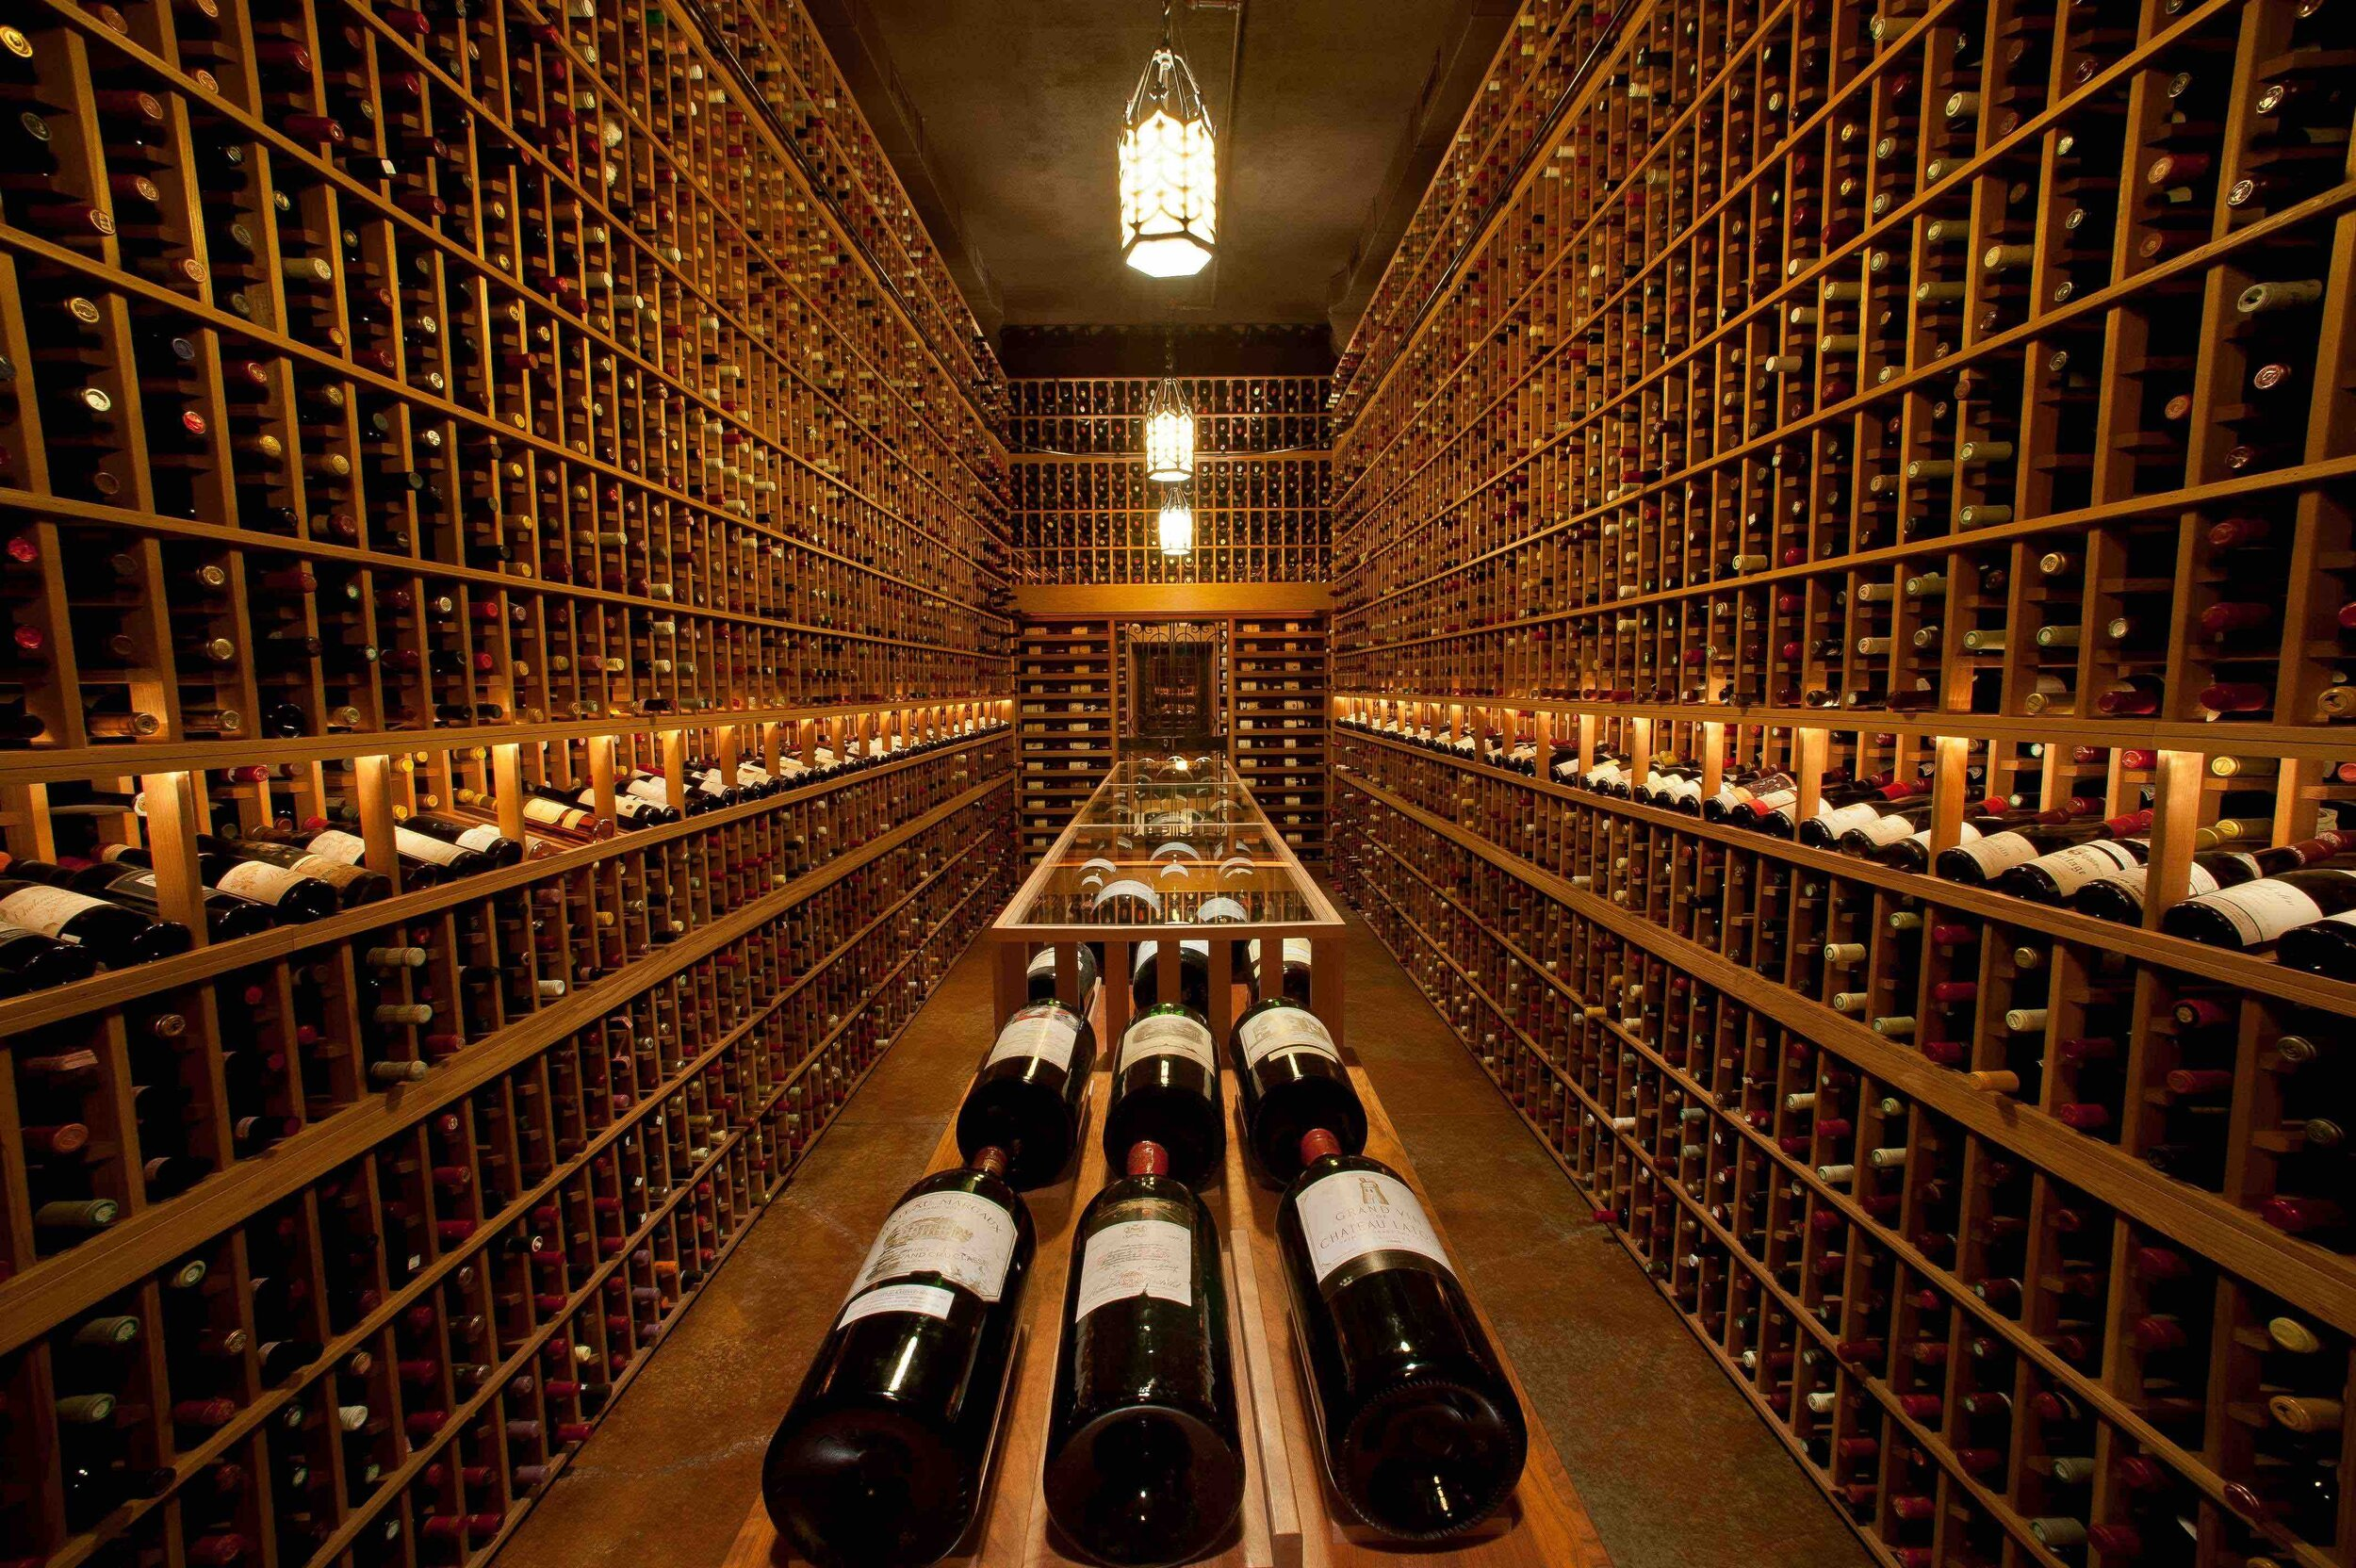

Task description:

It is necessary to identify the patterns that determine the popularity of the wine brand and try to find out what can be offered to wine buyers when choosing wine. This will allow you to bet on a potentially popular product and plan, for example, an advertising campaign for online stores that sell wine.

Completing the task involves:
1. <a href=#1>data preprocessing</a>
2. <a href=#2>explorational data analysis</a>
3. <a href=#3>drawing up a portrait of a critic</a>
4. <a href=#4>hypothesis testing</a>
5. <a href=#5>building a regression model showing the relationship between score and price</a>
6. <a href=#6>conclusions</a>

The goal of this project is to find out why wine is so popular in the world in terms of data analysis. In other words, to identify which signs most affect the rating of wine. The analysis uses a dataset from Kaggle, the world's largest community of data and machine learning specialists. The data set consists of 13 features (2 numeric features and 11 categorical features).

### <a name="1">1.Data preprocessing</a>
The main tasks of this stage:
1. Import libraries;
2. Upload data;
3. Replace column names; (if necessary);
4. Convert the data to the appropriate types;
5. Process omissions (if necessary);
6. Check for duplicates.

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# импорт библиотеки warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Data columns

- Country - the country of origin of the wine.
- Description — description of the taste profile of the wine.
- Designation - Vineyard, where grapes for wine come from.
- Points - the number of points that Wine Enthusiast magazine rated the wine on a scale from 1 to 100.
- Price - The cost of one bottle of wine.
- Province — the province or state from which the wine is produced.
- Region 1 — a wine-making zone in a province or state (for example, Napa Valley in California).
- Region 2 — (optional) a more specific region in the wine region (e.g. Rutherford in Napa Valley).
- Variety — the grape variety from which wine is made (for example, Pinot Noir).
- Winery — a winery that produces wine.

Loading data

In [2]:
df1 = pd.read_csv('./data/wine_reviews.csv')
df1.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek


In [3]:
shape = df1.shape
print("Dataset shape (rows, columns):\t {}".format(shape))

Dataset shape (rows, columns):	 (20000, 10)


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      20000 non-null  object 
 1   description  20000 non-null  object 
 2   designation  13999 non-null  object 
 3   points       20000 non-null  int64  
 4   price        18198 non-null  float64
 5   province     20000 non-null  object 
 6   region_1     16543 non-null  object 
 7   region_2     8058 non-null   object 
 8   variety      20000 non-null  object 
 9   winery       20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


The number of values in the columns varies. This indicates that there are empty values in the data. The points and price attribute are numeric. Using the seaborn library, we will build a heat map for data visualization.

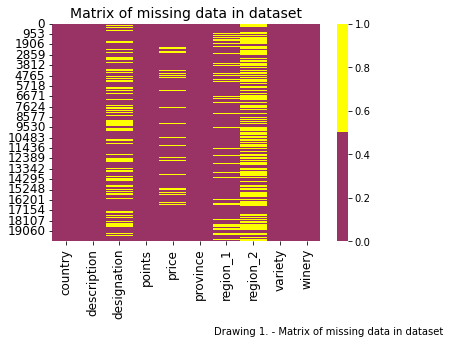

In [5]:
num = 1
colours = ['#993366', '#FFFF00']
sns.heatmap(df1.isnull(), cmap=sns.color_palette(colours))
# Decorations
plt.title('Matrix of missing data in dataset', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.5, -0.2, f"Drawing {num}. - Matrix of missing data in dataset")
num += 1
plt.show()

The number of missing values in each feature.

In [6]:
print(df1.isnull().sum())

country            0
description        0
designation     6001
points             0
price           1802
province           0
region_1        3457
region_2       11942
variety            0
winery             0
dtype: int64


The region_2 feature is not filled in by more than 50%, we will remove this attribute. Since it is not informative. The designation feature is not important for the study. Let's delete these columns.

In [7]:
# Drops unnecessary columns
df = df1.drop(columns = ["region_2", "designation"])

Delete entries with missing prices

In [8]:
total_records = len(df)
missing_prices = df["price"].isnull().sum()
missing_ratio = 100 - ((missing_prices / total_records) * 100)
print("Missing prices: {}".format(missing_prices)+ "\n" +
      "Total records: {}".format(total_records) + "\n" + 
      "Percentage remaining: {:.2f}%".format(missing_ratio))

Missing prices: 1802
Total records: 20000
Percentage remaining: 90.99%


If we delete all records with missing prices, we will be left with 90.9% of the dataset. We can safely discard records with missing values, it will not affect the results dramatically.

In [9]:
df = df.dropna(axis='index', how='any', subset=['price'])
print(df.count())

country        18198
description    18198
points         18198
price          18198
province       18198
region_1       15033
variety        18198
winery         18198
dtype: int64


In [12]:
print(df.isnull().sum())

country           0
description       0
points            0
price             0
province          0
region_1       3165
variety           0
winery            0
dtype: int64


In [13]:
print(df.count())

country        18198
description    18198
points         18198
price          18198
province       18198
region_1       15033
variety        18198
winery         18198
dtype: int64


Let's leave region_1 unchanged

Let's add the wine color column

In [14]:
color = {
"Chardonnay": "white",
"Pinot Noir": "red",
"Cabernet Sauvignon": "red",
"Red Blend": "red",
"Bordeaux-style Red Blend": "red",
"Sauvignon Blanc": "white",
"Syrah": "red",
"Riesling": "white",
"Merlot": "red",
"Zinfandel": "red",
"Sangiovese": "red",
"Malbec": "red",
"White Blend": "white",
"Rosé": "other",
"Tempranillo": "red",
"Nebbiolo": "red",
"Portuguese Red": "red",
"Sparkling Blend": "other",
"Shiraz": "red",
"Corvina, Rondinella, Molinara": "red",
"Rhône-style Red Blend": "red",
"Barbera": "red",
"Pinot Gris": "white",
"Viognier": "white",
"Bordeaux-style White Blend": "white",
"Champagne Blend": "other",
"Port": "red",
"Grüner Veltliner": "white",
"Gewürztraminer": "white",
"Portuguese White": "white",
"Petite Sirah": "red",
"Carmenère": "red"
}
df['color']= df['variety'].map(color)

Let's fill in the missing values in the "region_1" field.
To do that we will form a special dataset to search for data.

In [15]:
req_list = df[['winery','country']][df['region_1'].isna()].drop_duplicates()
req_list['wineryreq'] = df['winery'].apply(lambda x: "+".join(x.split(" "))).map(str) + "+" + df['country']
req_list['address'] = np.NaN
req_list.head()

,winery,country,wineryreq,address
5,F X Pichler,Austria,F+X+Pichler+Austria,NaN
11,Santa Rita,Chile,Santa+Rita+Chile,NaN
15,Indomita,Chile,Indomita+Chile,NaN
20,Slowine,South Africa,Slowine+South Africa,NaN
33,Undurraga,Chile,Undurraga+Chile,NaN


We will search for data via Google on the site https://www.vivino.com / providing special query of the wine region.
For queries like: 
- 'req_list['wineryreq'].loc[i]+"wine region"' 
- 'req_list['wineryreq'].loc[i]+" vivino region"'

Google provides a neat table indicating the wine region from which we can parse data.

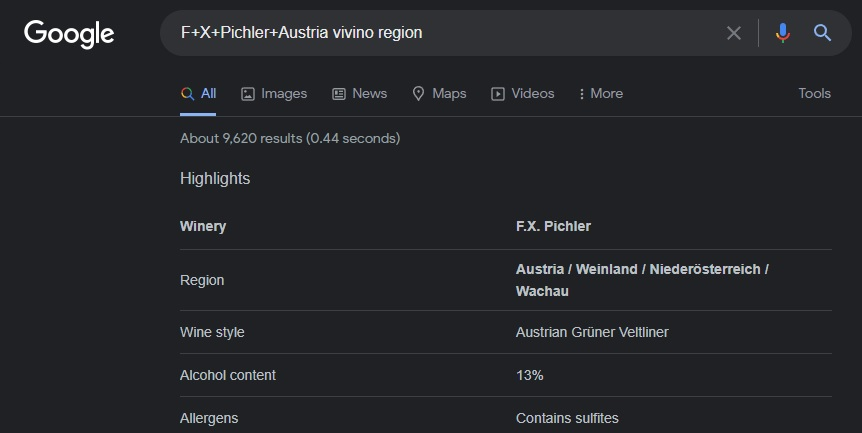
<p style="text-align: center"><font size="1">Рисунок 2. - пример поисковой выдачи Google</font></p>

In [10]:
import urllib #URL processing library
from requests_html import HTMLSession #HTML parsing library
def get_source(url): 
    """
    функция, формирующая GET-запрос
    """
    try:
        session = HTMLSession()        
        # vivino.com blocks automatic parsing via urllib. Let's bypass this restriction by stating Mozilla browser user-agent        
        headers = {
            'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:79.0) Gecko/20100101 Firefox/79.0',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
            'Accept-Language': 'en-GB,en;q=0.5',
            'Upgrade-Insecure-Requests': '1',
            'Connection': 'keep-alive',
            'Pragma': 'no-cache',
            'Cache-Control': 'no-cache',
            'TE': 'Trailers',}
        response = session.get(url, headers=headers)        
        return response
    except requests.exceptions.RequestException as e:
        print(e)
def google_search_vivino(query):    
    """
    функция для поиска в Google.
    """    
    query = urllib.parse.quote_plus(query, encoding='UTF8') #preprocessing query.
    response = get_source("https://www.google.ru/search?q=" + query) #getting search results
    results = response.html.find("tr") #поиск табличного тега   
    res = np.NaN  
    try:
        for i in results:  #search for the word 'Region' in the table        
            if i.text.find("Region") != -1:
                res = i.text
    except:
        res = np.NaN  #in case of a search error or if there is no table in the search results, specify np.NaN
    return res

Considering that it is necessary to send more than 900 requests to Google in a cycle and do it without the Google Search API key, it is necessary to form requests with a delay for a primitive imitation of the fact that the requests are carried out by a person. If there is no delay in requests, Google blocks the IP from which the requests leave, rightly believing that spamming is taking place. The delay interval between requests is set to 10 seconds, and a delay of another 50 seconds is added every 50 requests. The complete execution of the cycle takes about 3 hours. The results are saved in PKL format.

```python
import time
j = 0
for i in req_list.index:    
    j += 1    
    time.sleep(10)
    results = google_search_vivino(req_list['wineryreq'].loc[i]+" vivino region")
    if isinstance(results, float):
        time.sleep(5)
        results = google_search_vivino(req_list['wineryreq'].loc[i]+" wines region")
    print(req_list['wineryreq'].loc[i], results)
    req_list.loc[i,'address'] = results
    if j%50 == 0:
        time.sleep(100)
req_list.to_pickle('missing_adresses_vivino.pkl')
```

In [17]:
req_list = pd.read_pickle('missing_adresses_vivino.pkl')
req_list.head()

,winery,country,wineryreq,address
5,F X Pichler,Austria,F+X+Pichler+Austria,Region\nAustria / Weinland / Niederösterreich ...
11,Santa Rita,Chile,Santa+Rita+Chile,Region\nChile / Central Valley
20,Slowine,South Africa,Slowine+South+Africa,Region\nAfrique du Sud / Western Cape / Cape S...
37,Dry River,New Zealand,Dry+River+New+Zealand,Region\nNew Zealand / North Island / Wairarapa...
38,Casa Santos Lima,Portugal,Casa+Santos+Lima+Portugal,Region\nPortugal / Lisboa


The line with the region in the 'address' column is separated by a slash. The desired region is the last field.

In [18]:
req_list['m_region'] = req_list['address'].apply(lambda x: str(x).split('/')[-1].strip())
req_list['m_region'] = req_list['m_region'].apply(lambda x: str(x).split('delimiter')[-1].strip())
req_list['m_region'] = req_list['m_region'].apply(lambda x: str(x).replace("Region:", ""))
req_list['m_region'] = req_list['m_region'].apply(lambda x: str(x).replace("Sub-Region\n", ""))
req_list['m_region'] = req_list['m_region'].apply(lambda x: str(x).replace("Region:\n", ""))
req_list['m_region'] = req_list['m_region'].apply(lambda x: str(x).replace("Region\n", ""))
req_list['m_region'] = req_list['m_region'].apply(lambda x: str(x).replace("\n", ""))
req_list.loc[req_list['m_region'] == 'nan','m_region'] = np.NaN
req_list.loc[req_list['m_region'] == '','m_region'] = np.NaN
req_list.head()

,winery,country,wineryreq,address,m_region
5,F X Pichler,Austria,F+X+Pichler+Austria,Region\nAustria / Weinland / Niederösterreich ...,Wachau
11,Santa Rita,Chile,Santa+Rita+Chile,Region\nChile / Central Valley,Central Valley
20,Slowine,South Africa,Slowine+South+Africa,Region\nAfrique du Sud / Western Cape / Cape S...,Overberg
37,Dry River,New Zealand,Dry+River+New+Zealand,Region\nNew Zealand / North Island / Wairarapa...,Martinborough
38,Casa Santos Lima,Portugal,Casa+Santos+Lima+Portugal,Region\nPortugal / Lisboa,Lisboa


In [19]:
set(req_list['m_region'])

{'Aconcagua Valley',
 'Alenquer',
 'Alentejano',
 'Alentejo',
 'Amyndeon',
 'Attiki',
 'Awatere Valley',
 'Baden',
 'Bairrada',
 'Bannockburn',
 'Basto',
 'Beiras',
 'Bekaa Valley',
 'Breede River Valley',
 'Breedekloof',
 'Burgenland',
 'Cachapoal Valley',
 'Cape Agulhas',
 'Casablanca Valley',
 'Central Otago',
 'Central Valley',
 'Citrusdal Mountain',
 'Coastal Region',
 'Colchagua Valley',
 'Constantia',
 'Curico Valley',
 'DOURO',
 'Dalmatia',
 'Dealu Mare',
 'Douro',
 'Drama',
 'Durbanville',
 'Duriense',
 'Dão',
 'Elgin',
 'Elqui Valley',
 'Evora',
 'Franschhoek',
 'Germany',
 'Gimblett Gravels',
 'Gisborne',
 'Golan Heights (SY)',
 'Goriška Brda',
 "Hawke's Bay",
 'Huasco Valley',
 'Istra',
 'Johannisberg',
 'Judean Hills',
 'Kamptal',
 'Kanzem',
 'Kremstal',
 'Leiwen',
 'Leyda Valley',
 'Limarí Valley',
 'Lisboa',
 'Loncomilla Valley',
 'Lontue Valley',
 'Macedonia',
 'Maipo Valley',
 'Mantinea',
 'Marlborough',
 'Martinborough',
 'Maule Valley',
 'Moldova',
 'Montevideo',
 'M

Append the req_list dataset to the original dataset via the wineryreq field.

In [25]:
substitute = req_list[['wineryreq','m_region']].set_index('wineryreq').to_dict()['m_region']
df['wineryreq'] = df['winery'].apply(lambda x: "+".join(x.split(" "))).map(str) + "+" +  df['country']
df.loc[df['region_1'].isna() == True, 'region_1'] = df['wineryreq'].map(substitute)
df.isna().sum()

country        0
description    0
points         0
price          0
province       0
region_1       0
variety        0
winery         0
color          0
wineryreq      0
dtype: int64

Drop missing values.

In [26]:
df = df.dropna(axis='index', how='any', subset=['color', 'region_1'])
df = df.drop(columns = 'wineryreq')
print(df.count())

country        12071
description    12071
points         12071
price          12071
province       12071
region_1       12071
variety        12071
winery         12071
color          12071
dtype: int64


Drop duplicates.

In [27]:
df=df.drop_duplicates(keep=False)
df.head()

,country,description,points,price,province,region_1,variety,winery,color
0,US,"With a delicate, silky mouthfeel and bright ac...",86,23.0,California,Central Coast,Pinot Noir,MacMurray Ranch,red
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,96,275.0,Tuscany,Toscana,Red Blend,Castello dei Rampolla,red
2,France,The great dominance of Cabernet Sauvignon in t...,91,40.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend,Château Bernadotte,red
3,Italy,"The modest cherry, dark berry and black tea no...",81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano,red
4,US,"Exceedingly light in color, scent and flavor, ...",83,25.0,Oregon,Rogue Valley,Pinot Noir,Deer Creek,red


In [28]:
df.isna().mean()

country        0.0
description    0.0
points         0.0
price          0.0
province       0.0
region_1       0.0
variety        0.0
winery         0.0
color          0.0
dtype: float64

In [29]:
df.shape

(12071, 9)

###  <a name="2">2. Explorational data analysis</a>

The main tasks of the stage:<br>
1. Consider each feature of the dataframe
2. For each country, find the average price of wine. For each country, find the maximum price of wine. For each country, find the minimum price of wine. For each country, find the number of entries.
3. Determine which wines are leading the ratings. Choose several wines with the best rating.
- Plot the "box with a mustache" according to ratings by country, by wine varieties. Describe the result.
- Determine how reviews within one country affect prices. 
- Build a scatter plot and calculate the correlation between ratings and prices. Formulate conclusions.
- Look at the overall distribution of wines by country. What can be said about the most widespread varieties of wine? 
- Which region's wines (province) get the best rating?Are more expensive wines priced higher?
- Which part of the world produces wines with a higher rating?
- Which wine description is more highly appreciated?
- Which kind of wine is more highly appreciated?
- How much money does it cost to get a highly rated wine in the country?
- Which wineries produce the most expensive/highly rated wines?
- Which wineries/regions/countries produce wines with the lowest rating?
4. Conduct an analysis of the wine variety (for example, white wine Chardonnay) and analyzed the cost and quality in the main producing regions in the world.


In [30]:
country_to_continent = {
'Italy':'Europe',
'Portugal':'Europe',
'US':'North America',
'Spain':'Europe',
'France':'Europe',
'Germany':'Europe',
'Argentina':'Latin America',
'Chile':'Latin America',
'Australia': 'Oceania',
'Austria': 'Europe',
'South Africa': 'Africa',
'New Zealand': 'Oceania',
'Israel': 'Asia',
'Hungary':'Europe',
'Greece':'Europe',
'Romania':'Europe',
'Mexico':'Latin America',
'Canada':'North America',
'Turkey': 'Asia',
'Czech Republic': 'Europe',
'Slovenia': 'Europe',
'Luxembourg': 'Europe',
'Croatia': 'Europe',
'Georgia':'Europe',
'Uruguay': 'Latin America',
'England': 'Europe',
'Lebanon': 'Asia',
'Serbia': 'Europe',
'Brazil': 'Latin America',
'Moldova': 'Europe',
'Morocco':'Africa',
'Peru':'Latin America',
'India':'Asia',
'Bulgaria':'Europe',
'Cyprus': 'Europe',
'Armenia':'Asia',
'Switzerland':'Europe',
'Bosnia and Herzegovina':'Europe',
'Ukraine':'Europe',
'Slovakia':'Europe',
'Macedonia':'Europe',
'China':'Asia',
'Egypt':'Africa'
}

In [31]:
df['part_world'] = df.country.map(country_to_continent)

##### Dataframe features.

In [32]:
df.head()

,country,description,points,price,province,region_1,variety,winery,color,part_world
0,US,"With a delicate, silky mouthfeel and bright ac...",86,23.0,California,Central Coast,Pinot Noir,MacMurray Ranch,red,North America
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,96,275.0,Tuscany,Toscana,Red Blend,Castello dei Rampolla,red,Europe
2,France,The great dominance of Cabernet Sauvignon in t...,91,40.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend,Château Bernadotte,red,Europe
3,Italy,"The modest cherry, dark berry and black tea no...",81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano,red,Europe
4,US,"Exceedingly light in color, scent and flavor, ...",83,25.0,Oregon,Rogue Valley,Pinot Noir,Deer Creek,red,North America


##### Distribution of wines by country.

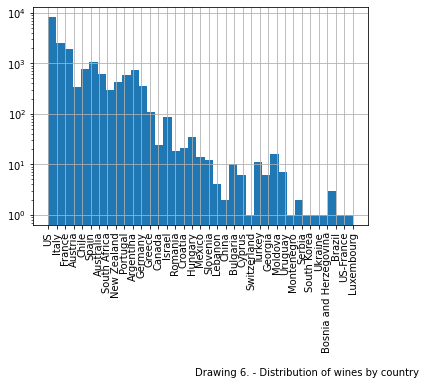

In [15]:
df.country.hist(bins=len(df.country.unique()), xrot = 90, log = True)
plt.figtext(0.5, -0.4, f"Drawing {num}. - Distribution of wines by country")
num += 1
plt.show()

In [40]:
print(f"Наибольшее количество вин представлено производителями из {df.country.value_counts().idxmax()} \
- {round(df.country.value_counts()[0]/df.shape[0]*100, 2)}%.")

Наибольшее количество вин представлено производителями из US - 54.8%.


##### Распределение вин по континентам.

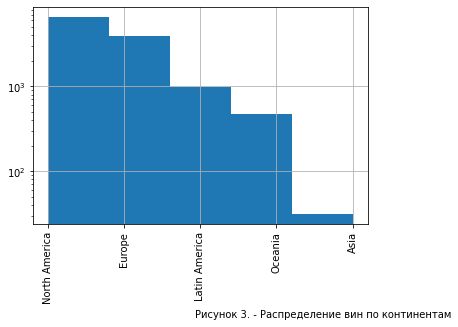

In [35]:
df.part_world.hist(bins=len(df.part_world.unique()), xrot = 90, log = True)
plt.figtext(0.5, -0.2, f"Рисунок {num}. - Распределение вин по континентам")
num += 1
plt.show()

In [41]:
print(f"Наибольшее количество вин представлено производителями из {df.part_world.value_counts().idxmax()}  \
- {round(df.part_world.value_counts()[0]/df.shape[0]*100, 2)}%.")

Наибольшее количество вин представлено производителями из North America  - 54.94%.


##### Распределение вин по 10 крупнейшим провинциям.

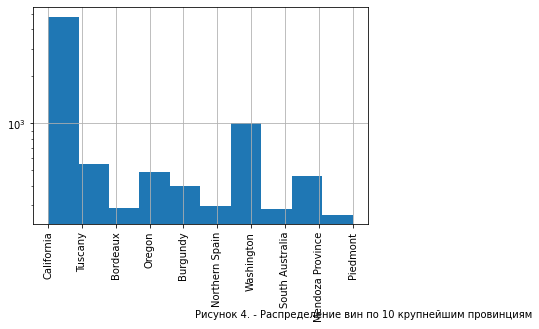

In [37]:
gProvince = df.province.value_counts()[:10].index
df[df['province'].isin(gProvince)]['province'].hist(xrot = 90, log = True)
plt.figtext(0.5, -0.2, f"Рисунок {num}. - Распределение вин по 10 крупнейшим провинциям")
num += 1
plt.show()

In [44]:
print(f"Наибольшее количество вин представлено производителями из провинции {df.province.value_counts().idxmax()} \
- {round(df.province.value_counts()[0]/df.shape[0]*100, 2)}%.")

Наибольшее количество вин представлено производителями из провинции California - 39.81%.


##### Распределение вин по 10 крупнейшим винодельческим регионам.

In [ ]:
gRegion = df.region_1.value_counts()[:10].index
df[df['region_1'].isin(gRegion)]['region_1'].hist(xrot = 90, log = True)
plt.figtext(0.5, -0.2, f"Рисунок {num}. - Распределение вин по 10 крупнейшим регионам")
num += 1
plt.show()

In [45]:
print(f"Наибольшее количество вин представлено производителями из региона {df.region_1.value_counts().idxmax()}с.")

Наибольшее количество вин представлено производителями из региона Napa Valley - 5.56%.


##### Распределение вин по 10 крупнейшим винодельням.

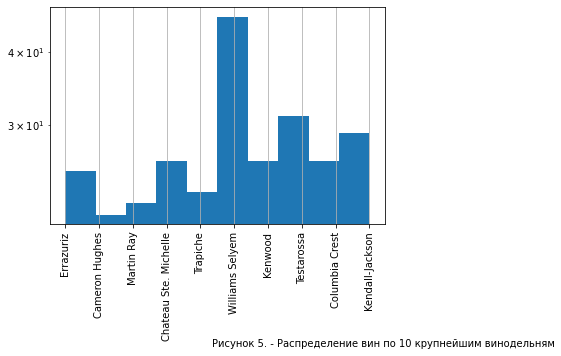

In [46]:
gWinery = df.winery.value_counts()[:10].index
df[df['winery'].isin(gWinery)]['winery'].hist(xrot = 90, log = True)
plt.figtext(0.5, -0.3, f"Рисунок {num}. - Распределение вин по 10 крупнейшим винодельням")
num += 1
plt.show()

In [47]:
print(f"Наибольшее количество вин представлено производителями из винодельни {df.winery.value_counts().idxmax()} \
- {round(df.region_1.value_counts()[0]/df.shape[0]*100, 2)}%.")

Наибольшее количество вин представлено производителями из винодельни Williams Selyem - 5.56%.


##### Сведения о ценах на вина по странам

In [48]:
agg_df = round(df[['country', 'price']].groupby(['country']).agg(maximum = ('price','max'),
                                                  minimum = ('price','min'),
                                                  mean = ('price','mean'),
                                                  number = ('price',len)),2)
agg_df

,maximum,minimum,mean,number
country,,,,
Argentina,215.0,6.0,23.59,536
Australia,550.0,5.0,31.62,466
Austria,89.0,10.0,27.03,111
Brazil,26.0,26.0,26.00,1
Bulgaria,20.0,20.0,20.00,1
Canada,145.0,13.0,39.59,17
Chile,260.0,7.0,20.59,439
Croatia,21.0,14.0,17.50,2
France,2300.0,6.0,50.45,1493


In [49]:
#Проверка целостности
agg_df.number.sum()==df.shape[0]

True

In [53]:
print(f"Наибольшее количество вин в датасете представлено производителями из {agg_df['number'].idxmax()}, \
с разбросом цены от {agg_df.loc[agg_df['number'].idxmax(), 'minimum']} до {agg_df.loc[agg_df['number'].idxmax(), 'maximum']} долларов.")
print(f"Самое дорогое вино представлено производителем из {agg_df['maximum'].idxmax()} по цене \
{agg_df['maximum'].max()} долларов.")
print(f"Самое дешевое вино представлено производителями из {', '.join(agg_df[agg_df['minimum'] == agg_df['minimum'].min()].index)} по цене \
{agg_df['minimum'].min()} долларов.")
print(f"Средние цены на вина варьируются от {agg_df['mean'].min()} долларов для {agg_df['mean'].idxmin()} до {agg_df['mean'].max()} долларов для {agg_df['mean'].idxmax()}.")

Наибольшее количество вин в датасете представлено производителями из US, с разбросом цены от 6.0 до 300.0 долларов.
Самое дорогое вино представлено производителем из France по цене 2300.0 долларов.
Самое дешевое вино представлено производителями из Australia, Portugal, Spain по цене 5.0 долларов.
Средние цены на вина варьируются от 11.67 долларов для Romania до 50.45 долларов для France.


##### Сведения о лучших марках вин.

In [54]:
maxRating = df[['variety', 'points']].sort_values(by = ['points'], ascending=False).head(15)
print("10 сортов вина, которым был присвоен максимальный рейтинг")
maxRating.drop_duplicates(subset=['variety'], keep = 'first')

10 сортов вина, которым был присвоен максимальный рейтинг


,variety,points
5955,Merlot,100
323,Chardonnay,100
9203,Nebbiolo,99
13188,Bordeaux-style Red Blend,99
9990,Portuguese Red,99
2458,Sparkling Blend,98
7169,Pinot Noir,98
15942,Cabernet Sauvignon,98
6363,Sangiovese,98
8545,Champagne Blend,97


##### Сведения о рейтингах на вина по странам и по сортам вина.

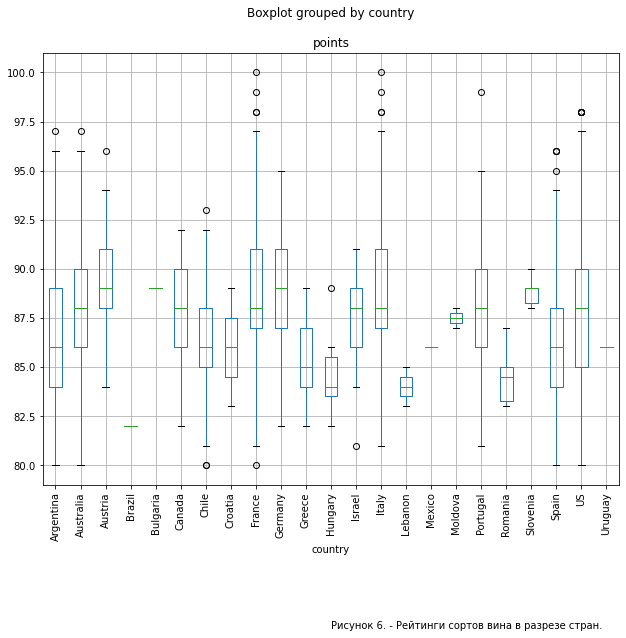

In [55]:
#Boxplot по странам
df.boxplot(by='country', column='points', figsize=(10,8), rot = 90)
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Рейтинги сортов вина в разрезе стран.")
plt.show()
num += 1

In [56]:
print("Наибольшее количество выбросов имеют оценки по итальянским винам.")
print("Выбросами можно признать значения оценок итальянских вин, большие 95 и меньшие 82,5.")
print("С другой стороны - оценки вин свыше 95 - крайне редки в целом, что может свидетельствовать об уникальности этих вин.")
print("Медианные значения рейтингов колеблются в диапазоне от 82 до 90.")

Наибольшее количество выбросов имеют оценки по итальянским винам.
Выбросами можно признать значения оценок итальянских вин, большие 95 и меньшие 82,5.
С другой стороны - оценки вин свыше 95 - крайне редки в целом, что может свидетельствовать об уникальности этих вин.
Медианные значения рейтингов колеблются в диапазоне от 82,5 до 90.


In [82]:
agg_df = round(df[['country', 'points']].groupby(['country']).agg(median = ('points','median')),2).unstack(level = -1)

In [84]:
agg_df[agg_df == agg_df.max()]

        country 
median  Austria     89.0
        Bulgaria    89.0
        Germany     89.0
        Slovenia    89.0
dtype: float64

In [85]:
agg_df[agg_df == agg_df.min()]

        country
median  Brazil     82.0
dtype: float64

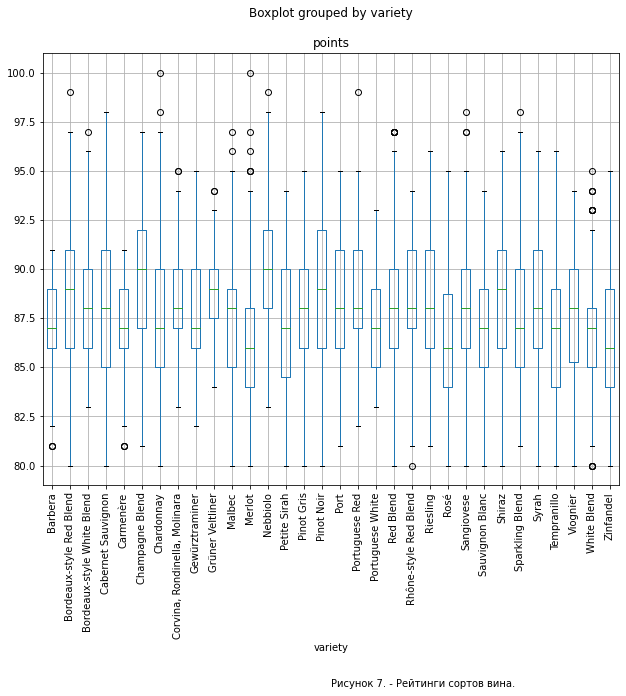

In [86]:
#Boxplot по сортам вина
df.boxplot(by='variety', column='points', figsize=(10,8), rot = 90)
plt.figtext(0.5, -0.2, f"Рисунок {num}. - Рейтинги сортов вина.")
plt.show()
num += 1

In [89]:
agg_df = round(df[['variety', 'points']].groupby(['variety']).agg(median = ('points','median')),2).unstack(level = -1)

In [90]:
agg_df[agg_df == agg_df.max()]

        variety        
median  Champagne Blend    90.0
        Nebbiolo           90.0
dtype: float64

In [91]:
agg_df[agg_df == agg_df.min()]

        variety  
median  Merlot       86.0
        Rosé         86.0
        Zinfandel    86.0
dtype: float64

In [92]:
print("Наибольшее количество выбросов имеют оценки по сорту Merlo.")
print("Выбросами для данного сорта можно признать значения оценок, большие 95.")
print("С другой стороны - оценки вин свыше 95 - крайне редки в целом, что может свидетельствовать об уникальности этих вин.")
print("Медианные значения рейтингов колеблются в диапазоне от 86 до 90.")
print("Более узкий диапазон медиан при разбивке по сортам вина в сравнении с разбивкой по странам,")
print("может свидетельствовать о том, что сорт винограда является более определяющим для вина, чем страна его происхождения.")

Наибольшее количество выбросов имеют оценки по сорту Merlo.
Выбросами для данного сорта можно признать значения оценок, большие 95.
С другой стороны - оценки вин свыше 95 - крайне редки в целом, что может свидетельствовать об уникальности этих вин.
Медианные значения рейтингов колеблются в диапазоне от 86 до 90.
Более узкий диапазон медиан при разбивке по сортам вина в сравнении с разбивкой по странам,
может свидетельствовать о том, что сорт винограда является более определяющим для вина, чем страна его происхождения.


##### Влияние отзывов на цены по странам.

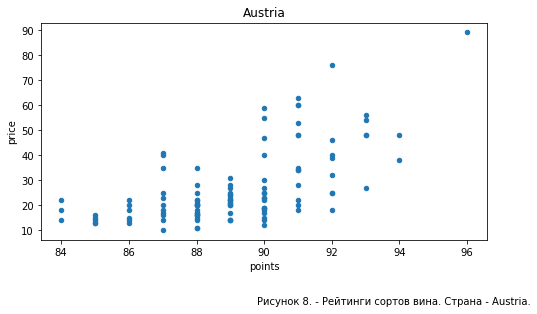

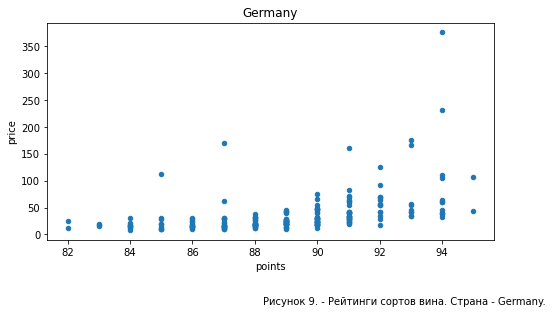

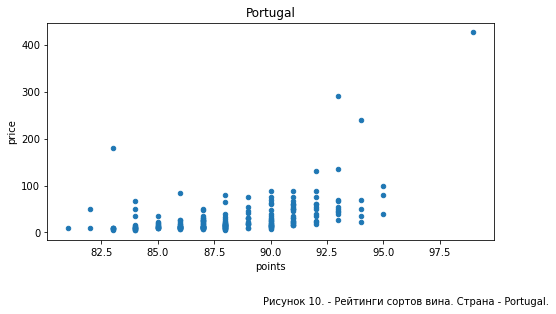

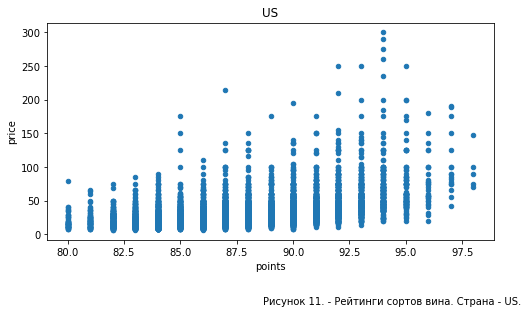

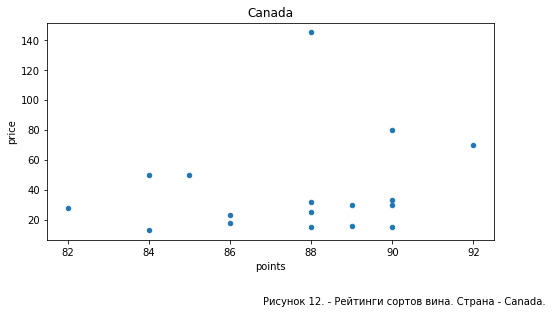

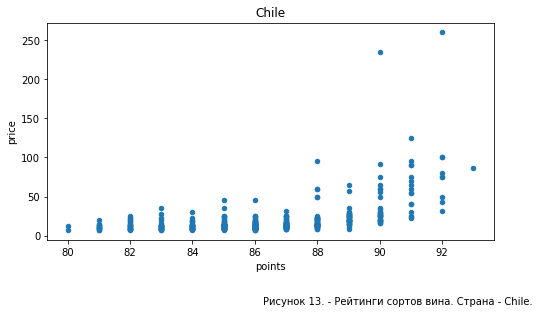

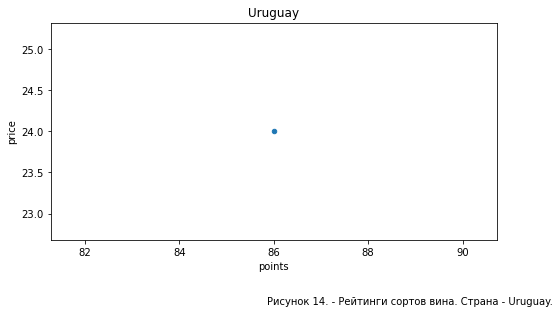

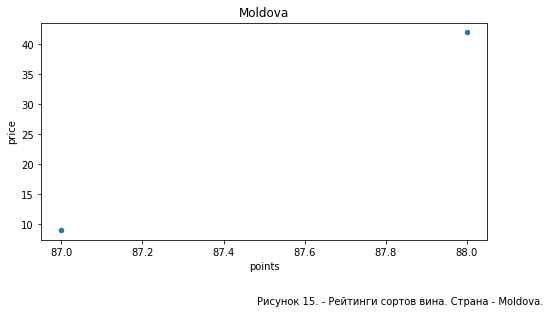

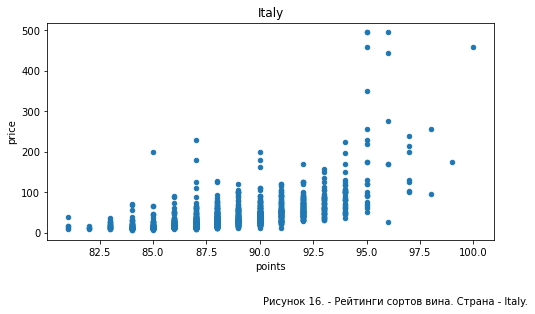

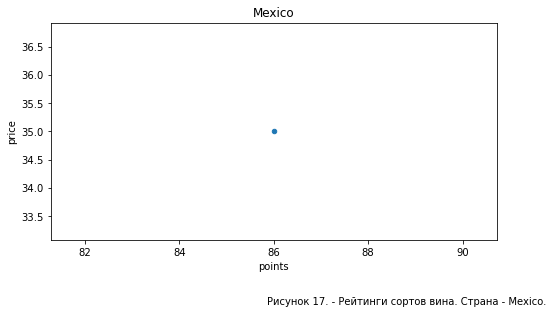

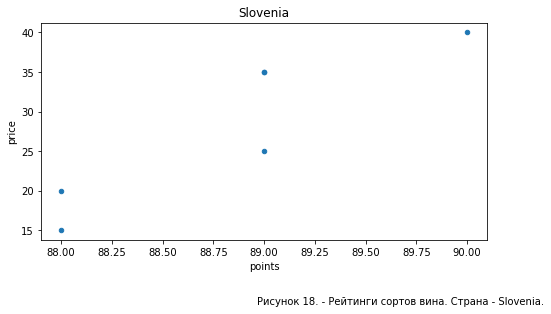

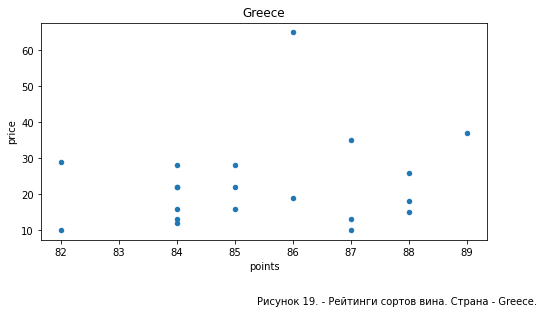

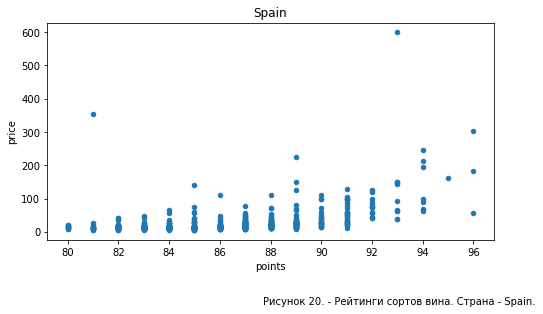

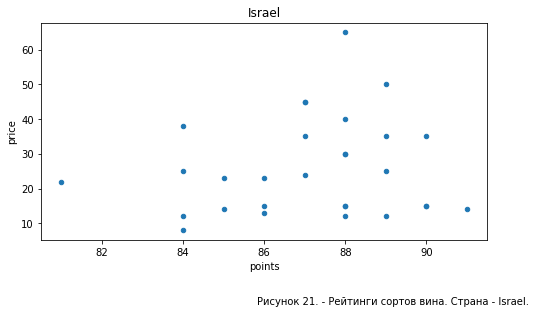

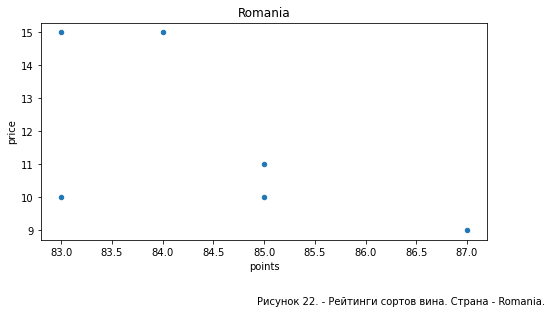

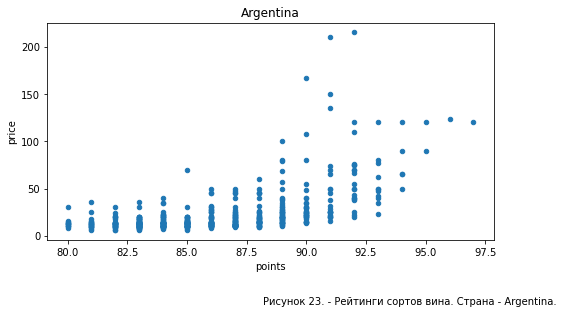

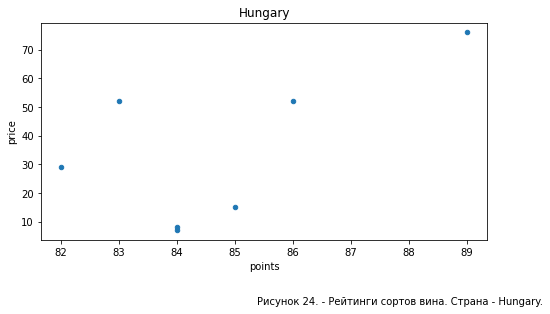

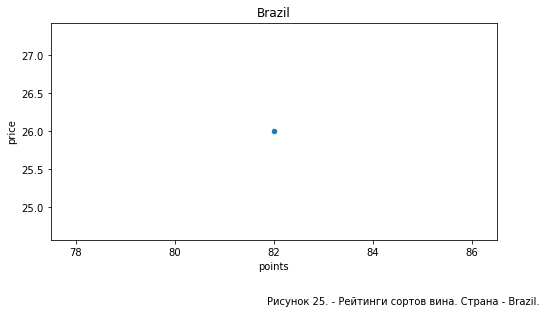

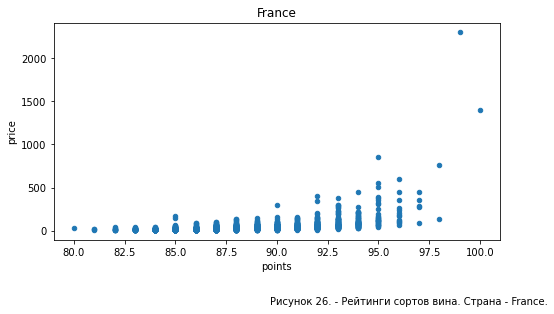

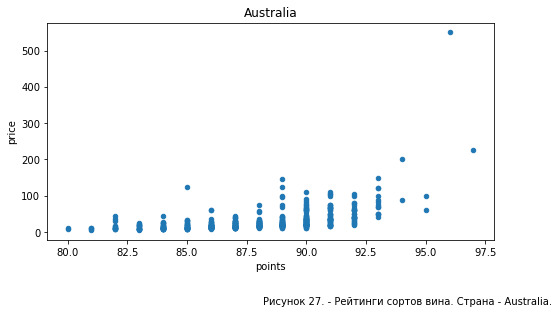

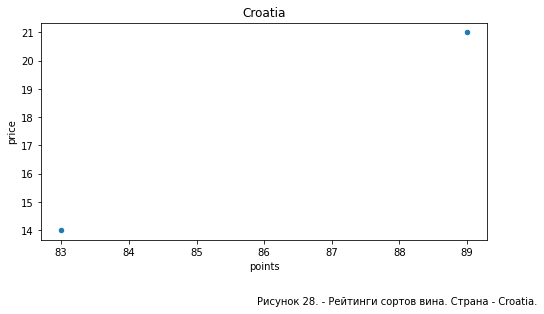

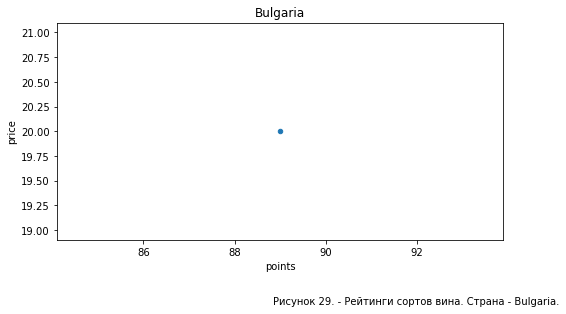

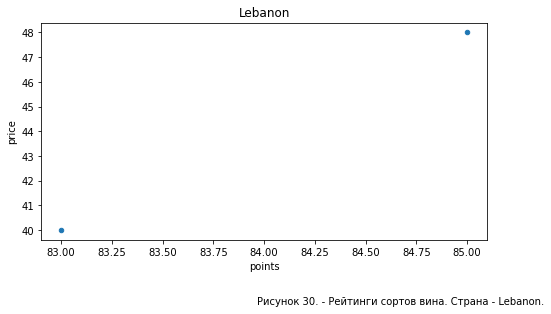

In [93]:
for i in set(df['country']):
    df[df['country']==i][['price','points']].plot(x='points', y='price', title=i, kind='scatter', figsize=(8,4))
    plt.figtext(0.5, -0.1, f"Рисунок {num}. - Рейтинги сортов вина. Страна - {i}.")
    plt.show()
    num += 1

In [94]:
print("В целом по страновым графикам можно предположить, что для более дорогих вин - отзывы лучше.")

В целом по страновым графикам можно предположить, что для более дорогих вин - отзывы лучше.


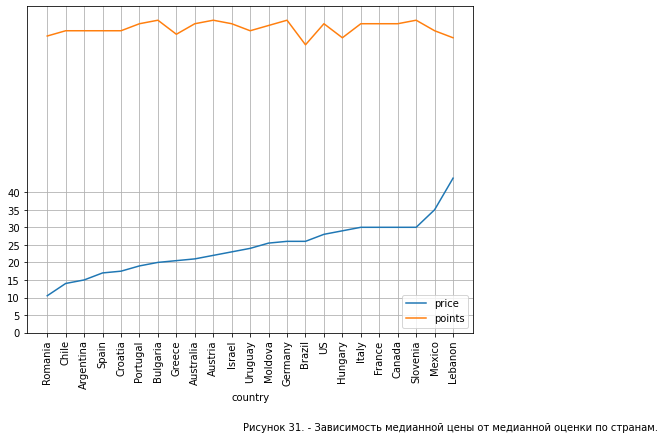

In [95]:
median_price_points_df = df[['country', 'price', 'points']].groupby(['country']).agg('median').sort_values('price')
median_price_points_df.plot(figsize=(8,6), grid=True)
plt.xticks(rotation=90)
plt.xticks(range(0,len(median_price_points_df.index)), median_price_points_df.index)
plt.yticks(range(0,median_price_points_df.max()[0].astype(int)+1, 5))
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Зависимость медианной цены от медианной оценки по странам.")
plt.show()
num += 1

In [96]:
print("Наблюдается тенденция, которая характеризуется при ростом медианной цены и константностью медианного рейтинга.")
print("При сравнении агрегированных значений в целом по странам, как для более дорогих вин Италии, так и для \n \
более дешевых вин Болгарии - медианный рейтинг - стабилен, что может развенчать миф об элитных и \n \
дорогих винах из Италии.")
print("При сравнении медианных значений отзывов и цен - наблюдается резкий пик по Турции.\n \
Учитывая то, что медианы оценок в среднем колеблются от 80 до 90, а медианы цен в общей массе \n \
от 5 до 50, для Турции наблюдается резкий пик на уровне 120.")

Наблюдается тенденция, которая характеризуется при ростом медианной цены и константностью медианного рейтинга.
При сравнении агрегированных значений в целом по странам, как для более дорогих вин Италии, так и для 
 более дешевых вин Болгарии - медианный рейтинг - стабилен, что может развенчать миф об элитных и 
 дорогих винах из Италии.
При сравнении медианных значений отзывов и цен - наблюдается резкий пик по Турции.
 Учитывая то, что медианы оценок в среднем колеблются от 80 до 90, а медианы цен в общей массе 
 от 5 до 50, для Турции наблюдается резкий пик на уровне 120.


In [97]:
df[df.country == 'Turkey'].shape

(0, 10)

Учитывая то, что для Турции представлена только одна марка вина ценой в 120 
 имеет смысл в целях сравнения цен и отзывов по странам - Турцию - исключить из сравнения


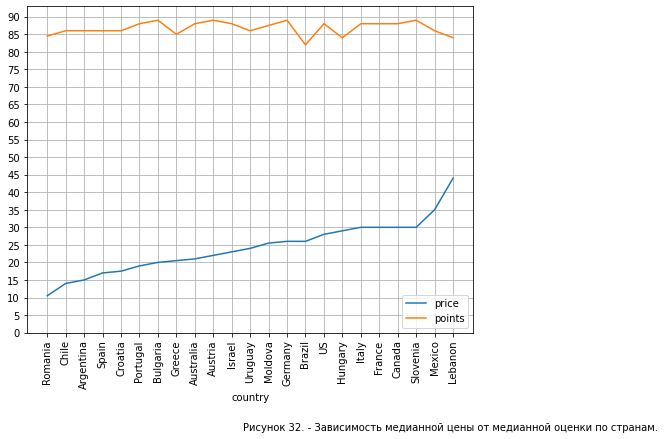

In [98]:
print("Учитывая то, что для Турции представлена только одна марка вина ценой в 120 \n \
имеет смысл в целях сравнения цен и отзывов по странам - Турцию - исключить из сравнения")
median_price_points_df = df[['country', 'price', 'points']][df.country != 'Turkey'].groupby(['country']).agg('median').sort_values('price')
median_price_points_df.plot(figsize=(8,6), grid=True)
plt.xticks(rotation=90)
plt.xticks(range(0,len(median_price_points_df.index)), median_price_points_df.index)
plt.yticks(range(0,median_price_points_df.max()[0].astype(int)+50, 5))
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Зависимость медианной цены от медианной оценки по странам.")
plt.show()
num += 1

##### Диаграмма рассеяния и посчитайте корреляцию между рейтингами и ценами.

В целом можно говорить о положительной корреляции между рейтингами и ценами


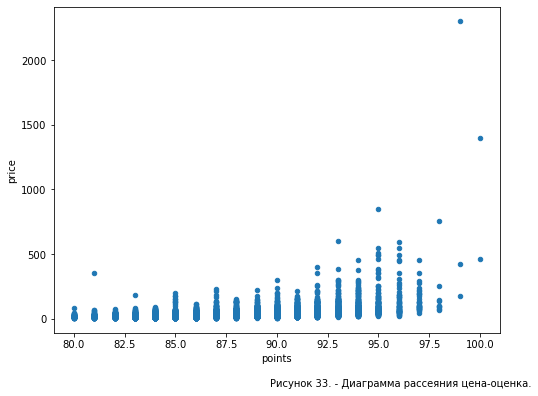

In [99]:
print("В целом можно говорить о положительной корреляции между рейтингами и ценами")
df[['points', 'price']].plot(x='points', y='price', kind='scatter', figsize=(8,6))
plt.figtext(0.5, 0, f"Рисунок {num}. - Диаграмма рассеяния цена-оценка.")

plt.show()
num += 1

In [102]:
df_cleaned = df[df.country != 'Turkey']
corr_price_points = df_cleaned[['country', 'price', 'points']].groupby(['country']).corr(method='pearson')
corr_price_points_new = corr_price_points.unstack()['price','points']
corr_price_points_new

country
Argentina    0.561913
Australia    0.490529
Austria      0.624784
Brazil            NaN
Bulgaria          NaN
Canada       0.186154
Chile        0.485189
Croatia      1.000000
France       0.455014
Germany      0.448843
Greece       0.184963
Hungary      0.600607
Israel       0.131573
Italy        0.580062
Lebanon      1.000000
Mexico            NaN
Moldova      1.000000
Portugal     0.482206
Romania     -0.595306
Slovenia     0.900755
Spain        0.458187
US           0.495766
Uruguay           NaN
Name: (price, points), dtype: float64

In [103]:
print("Наблюдаются пропуски при расчете корреляции по странам:")
corr_na = corr_price_points_new[corr_price_points_new.isna()].index.to_list()
corr_na

Наблюдаются пропуски при расчете корреляции по странам:


['Brazil', 'Bulgaria', 'Mexico', 'Uruguay']

In [104]:
df[df.country.isin(corr_na)].index.value_counts()

3572     1
4137     1
9151     1
18654    1
dtype: int64

In [105]:
print("Вина по данным странам присутствуют в единственном экземпляре, в связи с чем корреляцию рассчитать не удается,\n исключаем данные страны из ответа")

Вина по данным странам присутствуют в единственном экземпляре, в связи с чем корреляцию рассчитать не удается,
 исключаем данные страны из ответа


In [106]:
print("Для вин следующих стран наблюдается положительная и достаточно сильная 'больше 0.5' корреляция рейтинга и цены")
corr_price_points_new[~corr_price_points_new.isna() & (corr_price_points_new > .5)]

Для вин следующих стран наблюдается положительная и достаточно сильная 'больше 0.5' корреляция рейтинга и цены


country
Argentina    0.561913
Austria      0.624784
Croatia      1.000000
Hungary      0.600607
Italy        0.580062
Lebanon      1.000000
Moldova      1.000000
Slovenia     0.900755
Name: (price, points), dtype: float64

In [107]:
print("Для вин следующих стран наблюдается отрицательная корреляция рейтинга и цены:")
corr_price_points_new[~corr_price_points_new.isna() & (corr_price_points_new < 0)]

Для вин следующих стран наблюдается отрицательная корреляция рейтинга и цены:


country
Romania   -0.595306
Name: (price, points), dtype: float64

In [110]:
print("Для Румынии ожидания от повышения цены - не оправдались.")
df[df.country.isin(['Romania'])]

Для Румынии ожидания от повышения цены - не оправдались.


,country,description,points,price,province,region_1,variety,winery,color,part_world
5180,Romania,"Dense and syrupy like black cherry juice, this...",83,10.0,Dealurile Munteniei,Dealu Mare,Pinot Noir,Dreamer,red,Europe
8338,Romania,"Despite Romanian labeling standards, this frui...",87,9.0,Murfatlar,Murfatlar,Pinot Noir,Murfatlar,red,Europe
8504,Romania,Fresh red-cherry and strawberry flavors are vi...,85,11.0,Murfatlar,Murfatlar,Cabernet Sauvignon,Murfatlar,red,Europe
12434,Romania,Nice fruit aromas of blueberry and plum mingle...,84,15.0,Dealu Mare,Dealu Mare,Red Blend,Byzantium,red,Europe
16563,Romania,"Chunky and on the verge of plump, this wine ha...",83,15.0,Dealu Mare,Dealu Mare,Cabernet Sauvignon,Byzantium,red,Europe
19564,Romania,Although the nose on this medium-bodied Romani...,85,10.0,Dealu Mare,Dealu Mare,Red Blend,Byzantium,red,Europe


##### Общее распределение вин по странам.

In [111]:
group = df[['country', 'variety', 'points']].groupby(['country', 'variety']).agg(len)
most_wide_spread = group[group['points'] > 1000]
most_wide_spread.unstack()

points           
variety Cabernet Sauvignon Pinot Noir
country                              
US                    1055       1241

In [112]:
a = most_wide_spread.unstack(level=0).index.to_list()
print(f"Самыми распространенными сортами вина являются {', '.join(a)}, производства {most_wide_spread.unstack().index[0]}.")

Самыми распространенными сортами вина являются Cabernet Sauvignon, Pinot Noir, производства US.


##### Области (province) производящие вина с лучшими рейтингами

In [113]:
best =  df[['province', 'points', 'price']].sort_values('points', ascending = False).head(5).province.to_list()
print(f"Наилучший рейтинг получают вина областей {', '.join(best)}.")

Наилучший рейтинг получают вина областей Tuscany, Champagne, Piedmont, Bordeaux, Douro.


In [114]:
max_v = df[['province', 'points', 'price']][df['points'].isin([99,100])].max().values[2]
min_v = df[['province', 'points', 'price']][df['points'].isin([99,100])].min().values[2]
m = round(max_v/min_v,2)
print(f"Стоимость самого дешевого и дорогого из высокооцененных сортов вин различается в {m} раз.")
print("Это не свидетельствует о том, что более дорогие вина оцениваются выше.")

Стоимость самого дешевого и дорогого из высокооцененных сортов вин различается в 13.14 раз.
Это не свидетельствует о том, что более дорогие вина оцениваются выше.


##### Части мира, производящие вина с более высоким рейтингом

In [115]:
bestPartWorld = df[['part_world', 'points']][df['points'] == 100]
a = list(set(bestPartWorld['part_world']))[0]
print(f"Вина с более высоким рейтингом производятся в {a}")

Вина с более высоким рейтингом производятся в Europe


##### Описание вин с наивысшим рейтингом

In [116]:
bestDescription = df1[['description', 'points']][df1['points'] == 100]
bestDescription
print("Вина с наивысшим рейтингом имеют следующие описания:")
for description in bestDescription['description']:
    print(description)
    print("\n")

Вина с наивысшим рейтингом имеют следующие описания:
A wine that has created its own universe. It has a unique, special softness that allies with the total purity that comes from a small, enclosed single vineyard. The fruit is almost irrelevant here, because it comes as part of a much deeper complexity. This is a great wine, at the summit of Champagne, a sublime, unforgettable experience.


A perfect wine from a classic vintage, the 2007 Masseto (100% Merlot from a 17-acre vineyard of the same name) opens with an unabashedly opulent bouquet of delicious blackberry, cherry, chocolate, vanilla, exotic spice and cinnamon. Masseto excels both in terms of quality of fruit and winemaking and delivers plush, velvety tannins and an extra long, supple finish. It will make a special and valuable collection to your cellar.


Impossibly aromatic. Hard to imagine greater claret perfume. Shows the most refined mingling of smoky oak, cassis, cherries, roasted coconut macaroon, cocoa puff and spice sc

Вино, которое создало собственную вселенную. Его уникальная, особенная мягкость вкупе с превосходной чистотой пришла к нам из небольшой, единственной в своем роде винодельни. Оценивать букет в данном случае - бессмысленно, так как он является частью более глубокого уровня сложности. Это вино можно назвать великим, встречей с духом Шампани, тонким, незабываемым напитком.

Прекрасное вино из классической коллекции, Массето 2007 года (стопроцентное Мерло из семнадцатиакровой одноименной винодельни) открывается беззастенчиво роскошным букетом ежевики, вишни, шоколада, ванили, экзотических специй и корицы. Массето превосходно как в качестве букета так и виноделия в целом, несет в себе бархатистые танины и оставляет особенно длинное мягкое послевкусие. Оно добавит особенной ценности вашей коллекции.

Неописуемый аромат. Просто невозможно представить себе кларет с лучшим парфюмом. Это наиболее чистое смешение ароматов обожженного дуба, черной смородины, вишни, обжаренной кокосовой крошки, зерен какао и специй. Абсолютно первоклассное, как и вся продукция Долины Напа. Настойчивый, практически вызывающий зависимость восхитительный вкус совмещающий в себе чувственно-сухого вина. Это классическое вино, с превосходным балансом букета, кислот, танинов, аромата дубовых бочек, спиртов. Виноград растет на участке Слоун винодельни Сакраше, в горах Вака, высоко надо тропой Сильверадо. Большей частью это сорт Каберне Савиньон, выдержанный в абсолютно новых французских дубовых бочках. Совершенство в каждой бутылке. Вино года "2020".

##### Сорта вина с наивысшим рейтингом

In [117]:
bestDescription = df[['variety', 'points']][df['points'] == 100]
bestDescription = bestDescription['variety'].to_list()
print(f"Наиболее высоко оценены сорта: {', '.join(bestDescription)}")

Наиболее высоко оценены сорта: Chardonnay, Merlot


##### Цены на вина с наивысшим рейтингом по странам

In [118]:
group = df[['country','points']].groupby('country').agg(max)
g_pair = group.index.map(str) + group['points'].map(str)
g_pair = [i for i in g_pair.values]
df['combine'] = df['country'].map(str) + df['points'].map(str)
best_wine = df[df['combine'].isin(g_pair)]
best_wine['country'].value_counts()

US           5
Spain        3
Germany      2
Austria      1
Romania      1
Mexico       1
Slovenia     1
Israel       1
Moldova      1
Portugal     1
Brazil       1
Chile        1
Italy        1
Canada       1
France       1
Greece       1
Hungary      1
Bulgaria     1
Uruguay      1
Australia    1
Lebanon      1
Croatia      1
Argentina    1
Name: country, dtype: int64

In [119]:
print("Учитывая то, что для некоторых стран может быть несколько вин с высоким рейтингом - целесообразно провести агрегацию")

Учитывая то, что для некоторых стран может быть несколько вин с высоким рейтингом - целесообразно провести агрегацию


In [120]:
print("Средняя стоимость вина с наивысшим рейтингом по странам - равна:")
round(best_wine[['country','price']].groupby('country').agg('mean'),2)

Средняя стоимость вина с наивысшим рейтингом по странам - равна:


,price
country,
Argentina,120.00
Australia,225.00
Austria,89.00
Brazil,26.00
Bulgaria,20.00
Canada,70.00
Chile,86.00
Croatia,21.00
France,1400.00


##### Винодельни производящие самые дорогие/высоко оцененные вина

In [121]:
wineriesByPoints = df[['winery', 'points']][df['points'] == 100]
wineriesByPrice = df[['winery', 'price']][df['price'] == df['price'].max()]
a = ", ".join(wineriesByPrice['winery'].append(wineriesByPoints['winery']).values)
print(f"Винодельни, производящие самые дорогие/высокооцененные вина: {a}")

Винодельни, производящие самые дорогие/высокооцененные вина: Château Latour, Krug, Tenuta dell'Ornellaia


##### Винодельни/регионы/страны производящие вина с самым низким рейтингом

In [122]:
df[['winery','country', 'region_1', 'points']][df['points']==df['points'].min()]

,winery,country,region_1,points
219,Congress Springs,US,California,80
254,Cesar Lucendo,Spain,Vino de la Tierra de Castilla,80
429,Michel Torino,Argentina,Salta,80
449,Desert Wind,US,Wahluke Slope,80
699,Mosby,US,Santa Barbara County,80
...,...,...,...,...
18934,Bogle,US,California,80
19070,Merriam,US,Russian River Valley,80
19389,Gary Farrell,US,Dry Creek Valley,80
19639,Red Knot,Australia,South Australia,80


##### Анализ вина сорта Шардоне

In [123]:

Chardonnay = df[df['variety']=='Chardonnay']['country'].value_counts()
CharCountry = Chardonnay[Chardonnay > 200].index.to_list()
print(f"Основные страны производители вина Шардоне: {', '.join(CharCountry)}")
CharReg = df[['region_1', 'country']][(df['variety'] == 'Chardonnay') & df['country'].isin(CharCountry)]['region_1'].value_counts()

CharReg = CharReg[CharReg > 50].index.to_list()
df[['region_1', 'country']][(df['variety'] == 'Chardonnay') & df['region_1'].isin(CharReg)]
print(f"Основные регионы производства: {', '.join(CharReg)}")


Основные страны производители вина Шардоне: US, France
Основные регионы производства: Russian River Valley, Napa Valley, Carneros, California, Columbia Valley (WA), Chablis


In [124]:
char = df[(df['variety'] == 'Chardonnay') & df['region_1'].isin(CharReg)]
char.head()

,country,description,points,price,province,region_1,variety,winery,color,part_world,combine
83,US,This finest selection Chardonnay is a blend of...,90,30.0,California,Russian River Valley,Chardonnay,De Loach,white,North America,US90
236,US,"Not one of the better Ethos reserves, this is ...",87,25.0,Washington,Columbia Valley (WA),Chardonnay,Chateau Ste. Michelle,white,North America,US87
249,US,"Stainless- steel fermented, this Chard comes f...",87,18.0,California,Russian River Valley,Chardonnay,Balletto,white,North America,US87
307,US,The golf legend lends his name to this everyda...,84,15.0,California,California,Chardonnay,Arnold Palmer,white,North America,US84
361,US,The influence of sur lie aging marks this wine...,93,41.0,California,Russian River Valley,Chardonnay,Gary Farrell,white,North America,US93


In [125]:
print(f"Шардоне - это вино цвета {char.color.unique()[0]}.")

Шардоне - это вино цвета white.


Главный регион производства Шардоне - Russian River Valley.


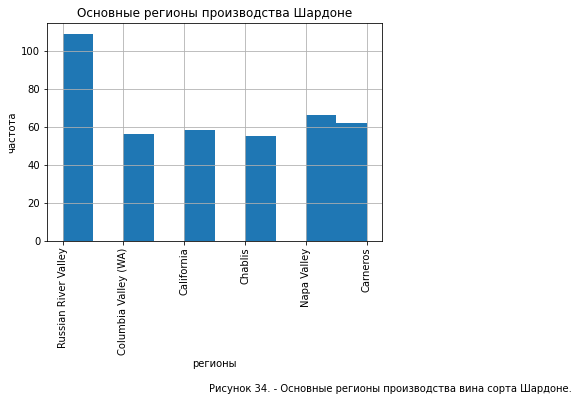

In [126]:
print(f"Главный регион производства Шардоне - {char['region_1'].value_counts().idxmax()}.")
char['region_1'].hist(xrot=90)
plt.title("Основные регионы производства Шардоне")
plt.xlabel('регионы')
plt.ylabel('частота')
plt.figtext(0.5, -0.4, f"Рисунок {num}. - Основные регионы производства вина сорта Шардоне.")
plt.show()
num += 1

Наиболее распространенная цена бутылки Шардоне основных регионов производства - 20.


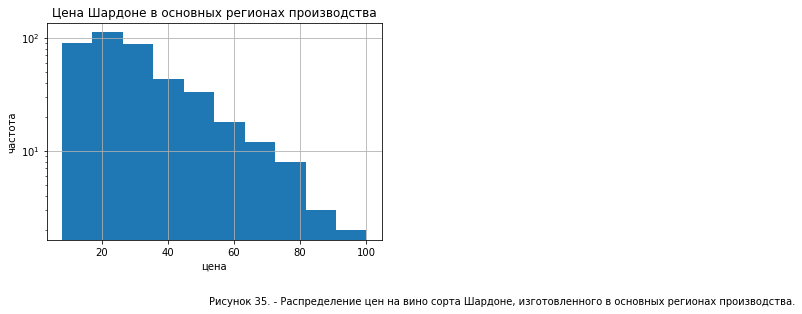

In [127]:
char['price'].hist(bins=10)
plt.title("Цена Шардоне в основных регионах производства")
plt.xlabel('цена')
plt.ylabel('частота')
plt.yscale('log')
print("Наиболее распространенная цена бутылки Шардоне основных регионов производства - 20.")
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Распределение цен на вино сорта Шардоне, изготовленного в основных регионах производства.")
plt.show()
num += 1

In [141]:
a = char[char['price'] == char['price'].max()]['winery'].to_list()[0]
print(f"Самое дорогое Шардоне основных регионов изготовления, производится на винодельне {a} по цене ${char['price'].max()}.")

Самое дорогое Шардоне основных регионов изготовления, производится на винодельне Domaine Laroche по цене $100.0.


Наиболее частая оценка вин Шардоне - 87 баллов


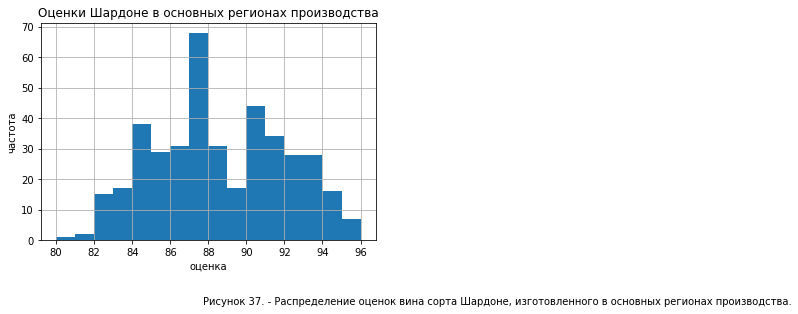

In [142]:
print("Наиболее частая оценка вин Шардоне - 87 баллов")
char['points'].hist(bins=16)
plt.title("Оценки Шардоне в основных регионах производства")
plt.xlabel('оценка')
plt.ylabel('частота')
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Распределение оценок вина сорта Шардоне, изготовленного в основных регионах производства.")
plt.show()
num += 1

In [143]:
char['points'].value_counts()

87    68
90    44
84    38
91    34
88    31
86    31
85    29
92    28
93    28
83    17
89    17
94    16
82    15
95     4
96     3
81     2
80     1
Name: points, dtype: int64

Изучим провал в оценках на уровне 89-90 

In [148]:
print(f"Цена данных вин ${char[char['points']==89]['price'].median()} - достаточно редка.")

Цена данных вин $29.0 - достаточно редка.


In [154]:
win89 = set(char[char['points']==89]['winery'])
num89 = len(win89)

winIntersect = win89 & set(char[(char['points'] < 89) | (char['points'] > 89)]['winery'])
numItersect = len(winIntersect)

a = round((num89 - numItersect)/num89*100)
print(f"{a}% процент виноделен, которые производят Шардоне с оценкой 89 баллов - не представлены среди производителей вин с оценками выше и ниже 89 баллов. \n")
print(f"Основное предположение: винодельни {win89 - winIntersect} - это новые, ранее не известные критикам либо нераскрученные винодельни/бренды.")

41% процент виноделен, которые производят Шардоне с оценкой 89 баллов - не представлены среди производителей вин с оценками выше и ниже 89 баллов. 

Основное предположение: винодельни {'Laird', 'Gordon Brothers', 'Porter Family Vineyards', 'Barnard Griffin', 'Mahoney', 'Château Souverain', 'Romain Bouchard'} - это новые, ранее не известные критикам либо нераскрученные винодельни/бренды.


In [152]:
df[df['winery'].isin(list(win89 - winIntersect))]['country'].drop_duplicates()

4817        US
6287    France
Name: country, dtype: object

In [135]:
df[df['winery'].isin(list(win89 - winIntersect))]['region_1'].drop_duplicates()

4817                 Carneros
5493     Columbia Valley (WA)
6287                  Chablis
6364     Russian River Valley
12223        Alexander Valley
12424            Red Mountain
16764             Napa Valley
Name: region_1, dtype: object

In [136]:
print("Данные винодельни с оценкой 89 - представлены только во Франции и США, только в основных регионах производства.")

Данные винодельни с оценкой 89 - представлены только во Франции и США, только в основных регионах производства.


### <a name="3">3. Портрет критика </a>

Для целей формирования портрета критика данный датасет можно трактовать как единый массив сформированный 1 критиком за некоторое продолжительное время, в таком случае - предпочтения пользователя: страновое, ценовое распределение, распределение вин по цветам, оценкам и цене представлены в итоговой работе в целом.

Тем не менее можно предположить, что данный датасет сформирован на отзывах разных пользователей и, используя методы классификации постараться сгруппировать датасет по описанию - признак description. Основное предположение в том, что каждый критик имеет свой лексикон и стилистику написания отзывов.

Для этого сгруппируем признак по темам, используя библиотеку Gensim. Gensim – это библиотека с открытым исходным кодом на Python, написанная Радимом Рехуреком, которая используется для тематического моделирования без учителя и обработки естественного языка (NLP). Она предназначена для извлечения семантических тем из документов.

In [155]:
from gensim import corpora
from gensim.models import Phrases, phrases
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation

In [156]:
descs = df['description']
stop_words = set(stopwords.words('english')) 
stop_words = stop_words.union(set(punctuation)) 
stop_words.update(["\'s", "n't"])

Приведем слова в описании description к их базовой форме (лемматизация).

In [157]:
lemmatizer = WordNetLemmatizer()
texts = []
for desc in descs:
    text = [lemmatizer.lemmatize(word) for word in word_tokenize(desc.lower()) if word not in stop_words]
    texts.append(text)

In [158]:
print(texts[100])

['blend', '60', 'merlot', '40', 'cabernet', 'sauvignon', 'sleek', 'wine', 'open', 'aroma', 'red', 'currant', 'bell', 'pepper', 'herb', 'juicy', 'palate', 'note', 'white', 'pepper', 'clove', 'add', 'interest', 'crushed', 'strawberry', 'cassis', 'tangy', 'acidity', 'polished', 'tannin', 'provide', 'framework']


разобьем описания на биграмы и триграмы, группы из 2 или трех последовательностей слов.

In [159]:
bigram = Phrases(texts, min_count=5, threshold=100)
trigram = Phrases(bigram[texts], threshold=100)
# threshold - пороговая величина оценки для определения фразы
# min_count - пороговая величина частоты слов и биграм ниже которой слова не рассматриваются в принципе
bigram_mod = phrases.Phraser(bigram) 
trigram_mod = phrases.Phraser(trigram)

In [160]:
 print(trigram_mod[bigram_mod[texts[100]]])

['blend', '60', 'merlot', '40', 'cabernet_sauvignon', 'sleek', 'wine', 'open', 'aroma', 'red', 'currant', 'bell_pepper', 'herb', 'juicy', 'palate', 'note', 'white', 'pepper', 'clove', 'add_interest', 'crushed', 'strawberry', 'cassis', 'tangy', 'acidity', 'polished', 'tannin', 'provide_framework']


provide_framework - была определена как словарная последовательность слов 'provide' и 'network'

Переопределим список описаний с учетом биграм и триграм. Также подготовим специальный словарь для библиотеки gensin, присваивающий идентификатор слову, биграму и триграму.

In [161]:
len(texts)

12071

In [162]:
texts = [trigram_mod[bigram_mod[text]] for text in texts]
id2word = corpora.Dictionary(texts)

Подготовим "мешки слов" для каждого описания, с указанием частоты употребления каждого слова.

In [163]:
from gensim.models import LdaModel
corpus = [id2word.doc2bow(text) for text in texts] 

In [164]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
    """
    рассчитаем когерентность тем    
    Параметры:
    ----------
    dictionary : словарь Gensim
    corpus : корпус Gensim состоящий из "мешков слов"
    texts : список вводимых описаний
    limit : Максимальное количество тем
    Вывод:
    -------
    model_list : Список моделей LDA для тем
    coherence_values : значения когерентности, соответствующие заданному количеству тем
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, 
                         num_topics=num_topics, 
                         id2word=id2word,
                         random_state=42) 
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

Проверим значения когерентности для количества тем начиная с 2 до 38 включительно с интервалом 6.

In [165]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=texts, 
                                                        limit=40, 
                                                        start=2, 
                                                        step=6)
coherence_values

[0.27210587631683936,
 0.32580615510165156,
 0.35029115281180967,
 0.3571778805710612,
 0.35074072389865374,
 0.34298737540324187,
 0.3486166734645092]

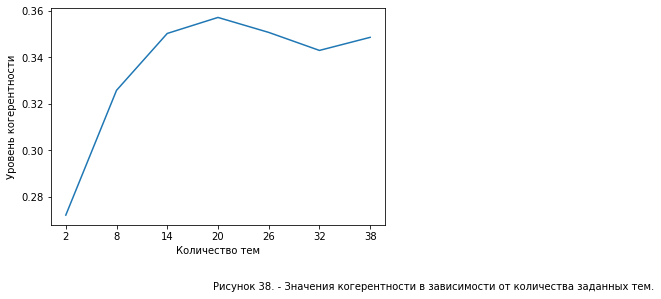

In [213]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values) 
plt.xlabel("Количество тем") 
plt.xticks(list(x)) 
plt.ylabel("Уровень когерентности") 
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Значения когерентности в зависимости от количества заданных тем.")
plt.show()
num += 1

In [167]:
max_index = coherence_values.index(max(coherence_values))

In [168]:
print(f"Наблюдается пик значения когерентности при {x[max_index]} темах. Ниже приводится их список.")

Наблюдается пик значения когерентности при 20 темах. Ниже приводится их список.


In [170]:
print(f"Приведем список тем, с весами, присвоенными словам в данной теме:")
test_lda = model_list[max_index]
test_lda.print_topics(num_words=20)

Приведем список тем, с весами, присвоенными словам в данной теме:


[(0,
  '0.022*"flavor" + 0.021*"apricot" + 0.021*"wine" + 0.018*"viognier" + 0.018*"honey" + 0.017*"anything" + 0.015*"apple" + 0.015*"sweet" + 0.014*"like" + 0.013*"acidity" + 0.013*"questionable" + 0.013*"chestnut" + 0.013*"flower" + 0.011*"tongue" + 0.010*"butterscotch" + 0.010*"pear" + 0.009*"almost" + 0.008*"lemon" + 0.008*"fruit" + 0.008*"creamy"'),
 (1,
  '0.036*"black" + 0.032*"cherry" + 0.024*"tannin" + 0.018*"palate" + 0.016*"merlot" + 0.016*"note" + 0.016*"offer" + 0.015*"fruit" + 0.014*"aroma" + 0.013*"blend" + 0.011*"cabernet_sauvignon" + 0.011*"chocolate" + 0.011*"plum" + 0.010*"leather" + 0.010*"spice" + 0.010*"blackberry" + 0.010*"pepper" + 0.009*"ripe" + 0.009*"clove" + 0.009*"tobacco"'),
 (2,
  '0.036*"wine" + 0.022*"fruit" + 0.017*"offer" + 0.017*"fresh" + 0.014*"cherry" + 0.013*"spice" + 0.013*"tone" + 0.013*"flavor" + 0.011*"cinsault" + 0.011*"aroma" + 0.011*"plump" + 0.009*"imported" + 0.009*"red" + 0.009*"mourvèdre" + 0.009*"bright" + 0.009*"touch" + 0.008*"syrah

In [171]:
print(f"Описания вин могут быть сгруппированы по {x[max_index]} словарным темам. \
Также можно предположить, что они были написаны {x[max_index]} критиками.")

Описания вин могут быть сгруппированы по 20 словарным темам. Также можно предположить, что они были написаны 20 критиками.


Классифицируем датасет по темам. К примеру предложение 'i like red wine with steak':

In [173]:
sentence = 'i like red wine with steak'
sentence2 = [word for word in sentence.lower().split()] 
arr = test_lda[id2word.doc2bow(sentence2)]
corr_v = pd.Series(data = [arr[i][1] for i in range(len(arr))],
                   index = [arr[i][0] for i in range(len(arr))])

In [174]:
print(f"Будет отнесено к теме с индексом {corr_v.idxmax()}.")

Будет отнесено к теме с индексом 10.


Предложение:

In [175]:
df_with_topic = df.reset_index(drop=True)
df_with_topic.loc[10000, 'description']

'A solid wine, finely constructed, its chunky tannins blending well with the red-plum-juice flavors. The acidity is important, along with the tasty cherry texture. Age for 3–4 years.'

In [176]:
def classify(idx):
    arr = test_lda[id2word.doc2bow(texts[idx])]
    corr_v = pd.Series(data = [arr[i][1] for i in range(len(arr))],
                       index = [arr[i][0] for i in range(len(arr))])
    #print(idx)
    return corr_v.idxmax()

In [177]:
print(f"Будет отнесено к теме с индексом {classify(10000)}.")

Будет отнесено к теме с индексом 8.


Классифицируем датасет по близости к определенной теме.

In [178]:
df_with_topic['topic_class'] = df_with_topic.index.map(lambda x: classify(x))

Опишем распределение датасета по темам(условным критикам).

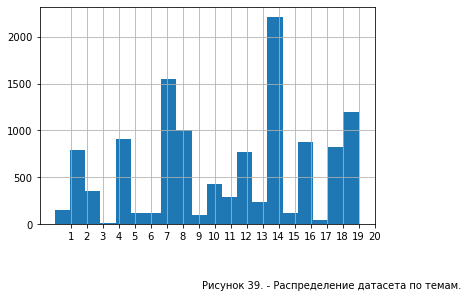

In [214]:
df_with_topic.topic_class.hist(bins=20)
plt.xticks(range(1,21))
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Распределение датасета по темам.")
plt.show()
num += 1

In [181]:
df_with_topic.topic_class.value_counts()

14    2211
7     1543
19    1191
8     1005
4      908
16     878
18     820
1      790
12     767
10     423
2      351
11     285
13     237
0      154
6      120
5      119
15     113
9      101
17      40
3       15
Name: topic_class, dtype: int64

In [182]:
print(f"Наибольшее количество отзывов принадлежит словарной теме/критику с данным стилем с индексом {df_with_topic.topic_class.value_counts().index[0]}.")

Наибольшее количество отзывов принадлежит словарной теме/критику с данным стилем с индексом 14.


In [210]:
import re
topic_14 =", ".join(re.sub(r'[\d\*\"\.\s]', '', test_lda.print_topics(num_words=20)[14][1]).split("+"))
print(f"Тема 14 характеризуется словами: {topic_14}.")

Тема 14 характеризуется словами: aroma, flavor, finish, palate, plum, fruit, wine, berry, nose, note, cherry, feel, black, spice, herbal, red, fresh, show, bit, offer.


In [211]:
topic = df_with_topic[df_with_topic['topic_class']==df_with_topic.topic_class.value_counts().index[0]]
topic.head()

,country,description,points,price,province,region_1,variety,winery,color,part_world,combine,topic_class
3,Italy,"The modest cherry, dark berry and black tea no...",81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano,red,Europe,Italy81,14
6,US,Addictive aromas of hot blackberry pie laced w...,93,40.0,California,Santa Barbara County,Syrah,Mulvane Wine Co.,red,North America,US93,14
7,US,Marc Piro broke away from his day job at Au Bo...,93,44.0,California,Santa Maria Valley,Pinot Noir,Piro,red,North America,US93,14
10,Chile,"Pithy and peachy on the nose, and not nearly a...",89,20.0,Leyda Valley,Central Valley,Sauvignon Blanc,Santa Rita,white,Latin America,Chile89,14
13,US,This selection (above reserve) from the estate...,85,60.0,Oregon,Oregon,Pinot Noir,Iris Vineyards,red,North America,US85,14


Данная словарная тема(условный критик) к тяготеет следующим распределениям:

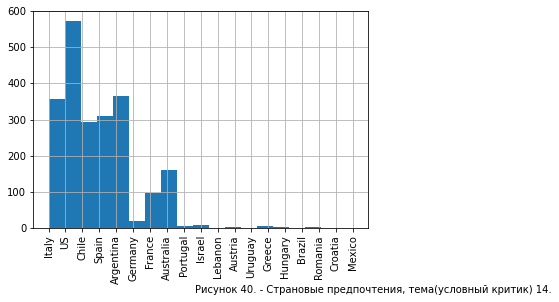

In [215]:
topic.country.hist(bins=len(topic.country.unique()),xrot=90)
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Страновые предпочтения, тема(условный критик) 14.")
plt.show()
num += 1

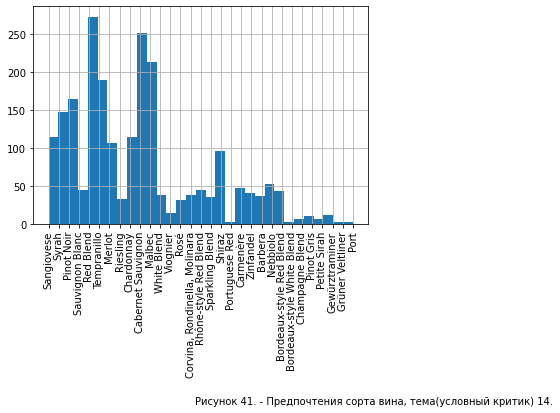

In [221]:
topic.variety.hist(bins=len(topic.variety.unique()),xrot=90)
plt.figtext(0.5, -0.5, f"Рисунок {num}. - Предпочтения сорта вина, тема(условный критик) 14.")
plt.show()
num += 1

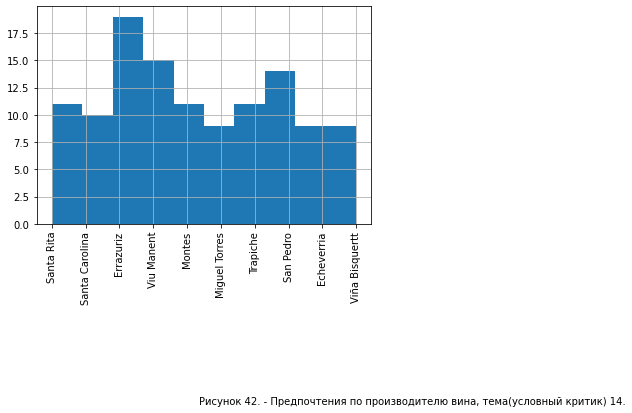

In [222]:
bins = 10
fav_winery = topic.winery.value_counts().index[:bins]
topic[topic['winery'].isin(fav_winery)]['winery'].hist(bins=bins,xrot=90)
plt.figtext(0.5, -0.5, f"Рисунок {num}. - Предпочтения по производителю вина, тема(условный критик) 14.")
plt.show()
num += 1

In [223]:
print(f"Для данной словарной темы (условного критика) предпочительны вина производства \
{topic.country.value_counts().index[0]}, сорта {topic.variety.value_counts().index[0]}, \
винодельни {fav_winery.value_counts().index[0]}.")

Для данной словарной темы (условного критика) предпочительны вина производства US, сорта Red Blend, винодельни Errazuriz.


### <a name="4">4. Проверка гипотез </a>

1. Проверить гипотезы: 
- H0: Рейтинг на вино производства Франции и на вино производства Италии одинаковы
- H1: Рейтинг на вино производства Франции и на вино производства Италии различны
- Переформулируйте
- H0:  Рейтинг на вино производства Франции и на вино производства Италии одинаковы
- H1: Рейтинг на вино производства Франции выше (ниже) на вино производства Италии
2. Проверить гипотезы:
- H0: Цена красного вина и белого одинаковы
- Н1: Цена красного вина и белого различны
- Переформулируйте
- H0:  Цена красного вина и белого одинаковы
- H1:  Цена красного вина выше (ниже) белого

**H0:Рейтинг на вино производства Франции и на вино производства Италии одинаковы**

**H1: Рейтинг на вино производства Франции и на вино производства Италии различны**

In [224]:
France_rating = df[df['country'] == 'France'].points
Italy_rating = df[df['country'] == 'Italy'].points
print("Количество рейтингов по Франции =", France_rating.count())
print("Количество рейтингов по Италии =", Italy_rating.count())

Количество рейтингов по Франции = 1493
Количество рейтингов по Италии = 1350


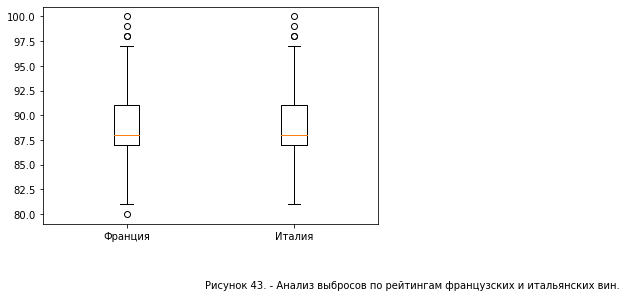

In [225]:
a = plt.boxplot([France_rating, Italy_rating], labels = ['Франция', 'Италия'])
whis = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Анализ выбросов по рейтингам французских и итальянских вин.")
plt.show()
num += 1

In [226]:
whis

[array([87., 81.]), array([91., 97.]), array([87., 81.]), array([91., 97.])]

In [227]:
print("Уберем выбросы.")
France_rating = df[(df['country'] == 'France') & (df['points'] <= max(whis[1])) & (df['points'] >= min(whis[0]))].points 
Italy_rating = df[(df['country'] == 'Italy') & (df['points'] <= max(whis[3]))].points

Уберем выбросы.


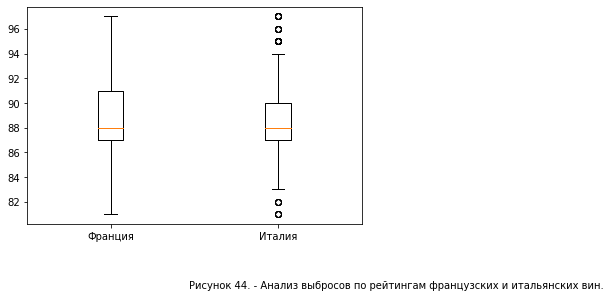

In [228]:
a = plt.boxplot([France_rating, Italy_rating], labels = ['Франция', 'Италия'])
whis = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Анализ выбросов по рейтингам французских и итальянских вин.")
plt.show()
num += 1

In [229]:
whis

[array([87., 81.]), array([91., 97.]), array([87., 83.]), array([90., 94.])]

In [230]:
print("Уберем выбросы.")
Italy_rating = df[(df['country'] == 'Italy') & (df['points'] <= max(whis[3])) & (df['points'] >= min(whis[2]))].points

Уберем выбросы.


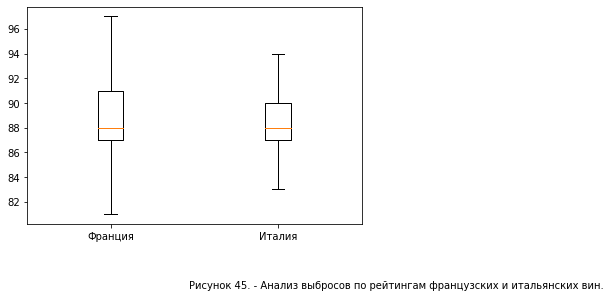

In [231]:
a = plt.boxplot([France_rating, Italy_rating], labels = ['Франция', 'Италия'])
whis = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Анализ выбросов по рейтингам французских и итальянских вин.")
plt.show()
num += 1

In [232]:
print("Количество рейтингов по Франции =", France_rating.count())
print("Количество рейтингов по Италии =", Italy_rating.count())

Количество рейтингов по Франции = 1488
Количество рейтингов по Италии = 1302


In [233]:
import scipy.stats as st
#Критерий Левена проверяет нулевую гипотезу о том, что дисперсии совокупности равны
st.levene(France_rating, Italy_rating)

LeveneResult(statistic=46.43823359300174, pvalue=1.154215622375648e-11)

In [234]:
value, p = st.normaltest(France_rating.sample(50))
print(value, p)
if p >= 0.05:
	print('Предположительно, распределение нормально.')
else:
	print('Предположительно, распределение не нормально.')

1.0805445053458218 0.5825896191997795
Предположительно, распределение нормально.


In [236]:

value, p = st.normaltest(Italy_rating.sample(50))
print(value, p)
if p >= 0.05:
	print('Предположительно, распределение нормально.')
else:
	print('Предположительно, распределение не нормально.')

4.377982518222021 0.11202970057787455
Предположительно, распределение нормально.


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(France_rating)
ax[0].set_title("Распределение оценок")
ax[0].set_xlabel("Французские вина")
ax[1].hist(Italy_rating)
ax[1].set_title("Распределение оценок")
ax[1].set_xlabel("Итальянские вина")
plt.show()

p-значение критерия Левена значительно меньше уровня статистической значимости, отвергаем гипотезу о равенстве, дисперсии выборок.

Проверка гипотезы:

H0: Рейтинги вина производства Франции и вина производства Италии одинаковы 

H1: Рейтинги вина производства Франции и вино производства Италии различны

In [237]:
alpha = .05             
results = st.ttest_ind(
                        France_rating, 
                        Italy_rating, 
                        equal_var=False)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("Нулевая гипотеза отвергается")
else:
        print("Нулевая гипотеза поддерживается")

p-value:  0.10498318472132867
Нулевая гипотеза поддерживается


**В случае принятия нулевой гипотезы - о равенстве выборочных средних проверять альтернативные гипотезы смысла не имеет.**

##### Вывод: в контексте сравнения средних рейтингов вина Франции и Италии:
##### Отклонить гипотезу о равенстве средних рейтингов французского и итальянского вина - не получилось. Принимается гипотеза о равенстве средних рейтингов французского и итальянского вина.

**H0: Цена красного вина и белого одинаковы** 

**Н1: Цена красного вина и белого различны** 

In [256]:
redWinePrice = df[df['color'] == 'red'].price
whiteWinePrice = df[df['color'] == 'white'].price
print("Количество цен красного вина =", redWinePrice.count())
print("Количество цен белого вина =", whiteWinePrice.count())

Количество цен красного вина = 8153
Количество цен белого вина = 3278


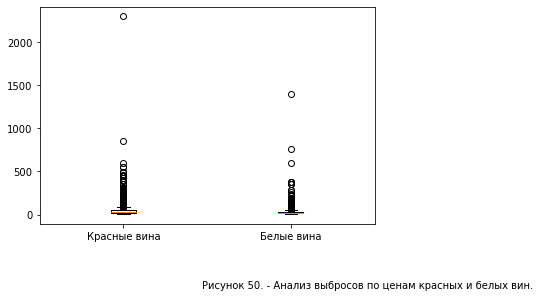

In [257]:
a = plt.boxplot([redWinePrice, whiteWinePrice], labels = ['Красные вина', 'Белые вина'])
whis_color = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Анализ выбросов по ценам красных и белых вин.")
plt.show()
num += 1

In [258]:
whis_color

[array([19.,  5.]), array([48., 91.]), array([15.,  5.]), array([31., 55.])]

In [259]:
print("Уберем выбросы.")
redWinePrice = df[(df['color'] == 'red') & (df['price'] <= max(whis_color[1]))].price
whiteWinePrice = df[(df['color'] == 'white') & (df['price'] <= max(whis_color[3]))].price
whis_color = [item.get_ydata() for item in a['whiskers']]

Уберем выбросы.


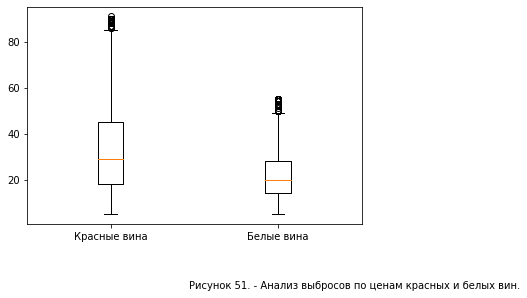

In [260]:
a = plt.boxplot([redWinePrice, whiteWinePrice], labels = ['Красные вина', 'Белые вина'])
whis_color = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Анализ выбросов по ценам красных и белых вин.")
plt.show()
num += 1

In [261]:
whis_color

[array([18.,  5.]), array([45., 85.]), array([14.,  5.]), array([28., 49.])]

In [262]:
print("Уберем выбросы.")
redWinePrice = df[(df['color'] == 'red') & (df['price'] <= max(whis_color[1]))].price
whiteWinePrice = df[(df['color'] == 'white') & (df['price'] <= max(whis_color[3]))].price
whis_color = [item.get_ydata() for item in a['whiskers']]

Уберем выбросы.


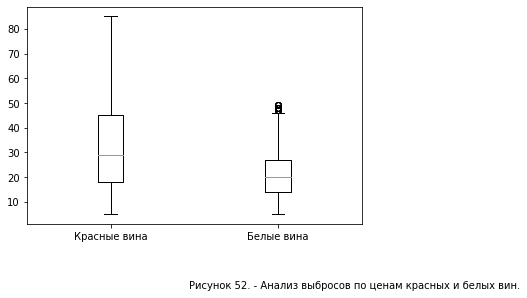

In [263]:
a = plt.boxplot([redWinePrice, whiteWinePrice], labels = ['Красные вина', 'Белые вина'])
whis_color = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Анализ выбросов по ценам красных и белых вин.")
plt.show()
num += 1

In [264]:
whis_color

[array([18.,  5.]), array([45., 85.]), array([14.,  5.]), array([27., 46.])]

In [265]:
print("Уберем выбросы.")

whiteWinePrice = df[(df['color'] == 'white') & (df['price'] <= max(whis_color[3]))].price
whis_color = [item.get_ydata() for item in a['whiskers']]

Уберем выбросы.


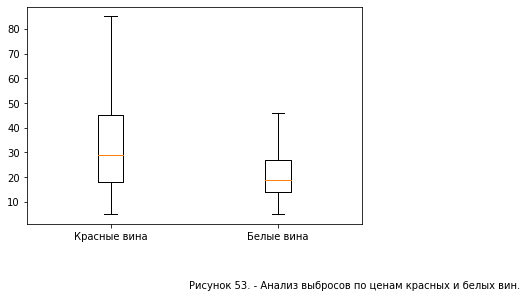

In [266]:
a = plt.boxplot([redWinePrice, whiteWinePrice], labels = ['Красные вина', 'Белые вина'])
whis_color = [item.get_ydata() for item in a['whiskers']]
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Анализ выбросов по ценам красных и белых вин.")
plt.show()
num += 1

In [267]:
print("Количество красных вин =", redWinePrice.count())
print("Количество белых вин =", whiteWinePrice.count())

Количество красных вин = 7672
Количество белых вин = 2931


In [268]:
st.levene(redWinePrice, whiteWinePrice)

LeveneResult(statistic=970.0250014907438, pvalue=7.509402023433882e-204)

In [271]:
value, p = st.normaltest(redWinePrice.sample(50))
print(value, p)
if p >= 0.05:
	print('Предположительно, распределение нормально.')
else:
	print('Предположительно, распределение не нормально.')

4.0330735627490695 0.13311567640379424
Предположительно, распределение нормально.


In [280]:
value, p = st.normaltest(whiteWinePrice.sample(50))
print(value, p)
if p >= 0.05:
	print('Предположительно, распределение нормально.')
else:
	print('Предположительно, распределение не нормально.')

4.726134216308045 0.09413106981884899
Предположительно, распределение нормально.


In [282]:
alpha = .05             
results = st.ttest_ind(
                        redWinePrice, 
                        whiteWinePrice, 
                        equal_var=False)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("Нулевая гипотеза отвергается")
else:
        print("Нулевая гипотеза поддерживается")

p-value:  0.0
Нулевая гипотеза отвергается


**Результат p-value. Вероятность того что средние совпадут (H0) в контексте сравнения с альтернативной гипотезой - слишком мала. Нулевая гипотеза отвергается. Соответственно принимается альтернативная - средние цены красных и белых вин - различны**

**H0: Цена красного вина и белого одинаковы**

**H1: Цена красного вина выше белого**

In [283]:
alpha = .05             
results = st.ttest_ind(
                        redWinePrice, 
                        whiteWinePrice, 
                        equal_var=False,
                        alternative='greater')
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("Нулевая гипотеза отвергается")
else:
        print("Нулевая гипотеза поддерживается")

p-value:  0.0
Нулевая гипотеза отвергается


**Результат p-value. Вероятность того что средние совпадут (H0) в контексте сравнения с альтернативной гипотезой - слишком мала. Нулевая гипотеза отвергается. Соответственно принимается альтернативная - средние цены красных вин выше белых**

**H0: Цена красного вина и белого одинаковы**

**H1: Цена красного вина меньше белого**

In [286]:
alpha = .05             
results = st.ttest_ind(
                        redWinePrice, 
                        whiteWinePrice, 
                        equal_var=False,
                        alternative='less')
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("Нулевая гипотеза отвергается")
else:
        print("Нулевая гипотеза поддерживается")

p-value:  1.0
Нулевая гипотеза поддерживается


**Результат p-value. Вероятность того что средние совпадут (H0) в контексте сравнения с альтернативной гипотезой - велика. Нет абсолютно никаких оснований отвергать нулевую гипотезу.**

##### Вывод: в контексте сравнения средних цен на красные и белые вина:
##### 1.Скорее среднице цены различны, чем равны.
##### 2.Скорее средняя цена красного вина превосходит цену белого, чем они равны.
##### 3.Скорее средний средние цены красных и белых вин равны, чем цена красного вина ниже цены белого.

### <a name="5">5. Регрессионная модель, показывающая зависимость между баллом и ценой </a>

Разделим выборку на обучающую и тестовую

In [287]:
from sklearn.model_selection import train_test_split
X = df['points'].values.reshape(-1,1)
y = np.log(df['price'].values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

In [288]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) # обучение модели
w = model.coef_
b = model.intercept_
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

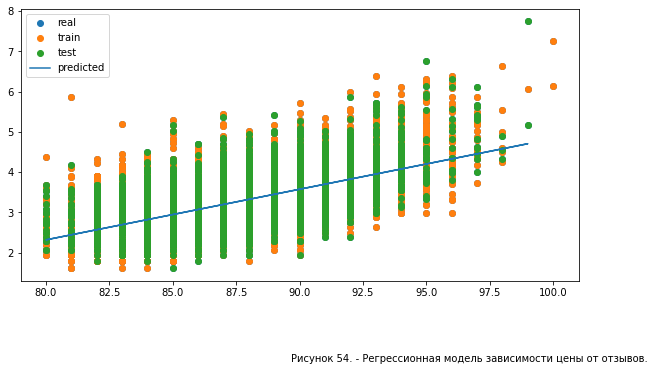

In [289]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_test_predicted, label='predicted')
plt.legend()
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Регрессионная модель зависимости цены от отзывов.")
plt.show()
num += 1

In [296]:
np.round(w,2)

array([[0.13]])

In [297]:
np.round(b,2)

array([-7.73])

Оценка погрешности модели:

In [290]:
from sklearn.metrics import mean_squared_error, r2_score
print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  0.27988452055460983
Test MSE:  0.2842343001513946


In [291]:
from sklearn.metrics import mean_absolute_error
print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  0.41954953317983845
Test MAE:  0.4229874719309041


In [292]:
print('Train R2: ', r2_score(y_train, y_train_predicted))
print('Test R2: ', r2_score(y_test, y_test_predicted))

Train R2:  0.3864137756255277
Test R2:  0.3712773491047743


Уточним модель добавив категориальный признак цвета вина:

In [298]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

In [299]:
X = df[['points','color']]
y = np.log(df['price'].values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 42)

In [306]:
X_train_categor = one_hot_encoder.fit_transform(X_train['color'].values.reshape(-1,1))
X_test_categor = one_hot_encoder.transform(X_test['color'].values.reshape(-1,1))

In [308]:
X_train_other = X_train['points'].values.reshape(-1,1)
X_test_other = X_test['points'].values.reshape(-1,1)

In [312]:
X_train_categor

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [316]:
X_train_concat = np.hstack((X_train_other, X_train_categor))
X_test_concat = np.hstack((X_test_other, X_test_categor))

In [318]:
model_new = LinearRegression()
model_new.fit(X_train_concat, y_train)
w_new = model_new.coef_
b_new = model_new.intercept_
y_train_predicted_new = model_new.predict(X_train_concat)
y_test_predicted_new = model_new.predict(X_test_concat)

Оценка погрешности уточненной модели

In [319]:
print('Train MSE: ', mean_squared_error(y_train, y_train_predicted_new))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted_new))

Train MSE:  0.2652454233097637
Test MSE:  0.2703529389585794


In [320]:
print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted_new))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted_new))

Train MAE:  0.4056145495199799
Test MAE:  0.4100700061366709


In [322]:
print('Train R2: ', r2_score(y_train, y_train_predicted_new))
print('Test R2: ', r2_score(y_test, y_test_predicted_new))

Train R2:  0.41850682739172307
Test R2:  0.4019827432198837


Сравним качество моделей

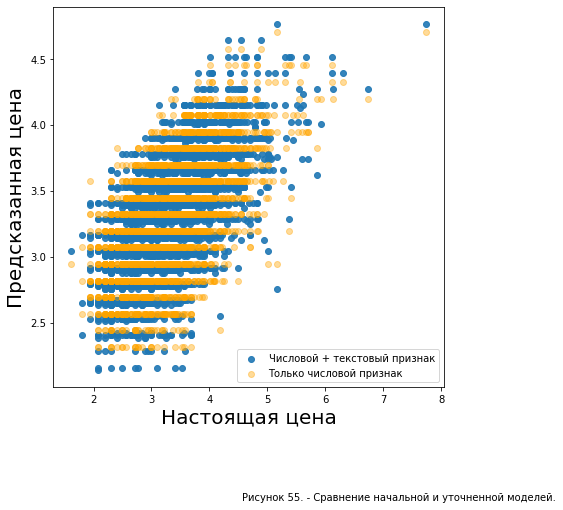

In [335]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_test_predicted_new, alpha=0.9, label='Числовой + текстовый признак');
plt.scatter(y_test, y_test_predicted, color='orange', alpha=0.4, label='Только числовой признак');
plt.legend()
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);
plt.figtext(0.5, -0.1, f"Рисунок {num}. - Сравнение начальной и уточненной моделей.")

plt.show()
num += 1

Добавление параметра 'цвет вина' улучшило качество модели

### <a name="5">6. Выводы </a>

В данной итоговой работе был использован для анализа датасет с 20000 оценками различных категорий вин. Источником данного датасета является выборка рецензий вин журнала WineEnthusiast.

**Предобработка данных:** 
- была проведена оценка пропущенных значений признаков, 
- удалены признаки 'region_2' как заполненный менее чем на половину и 'designation' как незначимый для целей исследования,
- удалены записи с неуказанными ценами,
- добавлены признаки цвета вина и части света, в которой расположен производитель,
- удалены записи, для которых цвет вина был неизвестен,
- признак region_1 был дозаполнен парсингом поисковой выдачи с сайта vivino.com, парсинг был произведен с помощью Get-запросов через периодические временные интервалы. Запросы были сформированы так, чтобы обойти запрет сайта на сбор данных поисковыми алгоритмами.
- удалены дубликаты записей.
В результате был получен полностью заполненный датасет размером в 12071 запись.

**Исследовательский анализ данных**
- Наибольшее количество записей датасета описывает вина американского производства - 54,8%.
- Соответственно, большее количество записей датасета относится к Северной Америке - 54,94%.
- После анализа винодельческих провинций стало ясно, что большинство записей относится к калифорнийским винам - 39,81%
- Основным винодельческим регионом, представленным в датасете является долина Напа, Калифорния - 5,56%.
- Главным производителем вина в датасете является Williams Selyem, Калифорния, США - 5.56%
- Наибольшее количество вин в датасете представлено производителями из US, с разбросом цены от 6.0 до 300.0 долларов.
- Самое дорогое вино представлено производителем из France по цене 2300.0 долларов.
- Самое дешевое вино представлено производителями из Австралии, Португалии и Испании по цене 5.0 долларов.
- Среднестрановые цены на вина варьируются от 11.67 долларов для Румынии до 50.45 долларов для Франции.
- Наилучшими среди вин, которым критиками были присвоенны наилучшие 100 баллов оказались вина сорта Мерло и Шардоне.
- Медианный рейтинг вин по странам варьируется от 82 для Бразилии и до 89 для Австрии, Болгарии, Германии и Словении.
- Медианный рейтинг вин по сортам варьируется от 86 для Мерло, Розе, Цинфанделя до 90 для Шампань Бленд и Небиолло.
- Более узкий диапазон медиан при разбивке по сортам вина в сравнении с разбивкой по странам, может свидетельствовать о том, что сорт винограда является более определяющим для вина, чем страна его происхождения.
- В целом, по исходя из странового анализа зависимости цен и отзывов для большинства стран достаточно характерна зависимость увеличения цены при увеличении рейтинга.
- Наблюдается тенденция, которая характеризуется при ростом медианной цены и константностью медианного рейтинга. При сравнении агрегированных значений в целом по странам, как для более дорогих вин Италии, так и для более дешевых вин Болгарии - медианный рейтинг - стабилен, что может развенчать миф об элитных и дорогих винах из Италии.
- Для вин из Аргентины, Австрии, Хорватии, Италии, Ливана, Молдовы и Словении наблюдается положительная и достаточно устойчивая 'больше 0.5' корреляция рейтинга и цены, т.е. чем выше цена - тем выше рейтинг.
- Для румынских вин наоборт, наблюдается устойчивая отрицательная корреляция рейтинга и цены. Данный факт в целом свидительствует о том, что ожидания от более дорогих вин не оправдались. Если предположить, что отзывы были собраны за достаточно короткий промежуток времени, можно сказать, что рынок румынских вин должен измениться в сторону удешевления, поскольку предложение следует за спросом.
- Самыми распространенными сортами вина датасета являются Каберне Савиньон и Пино Нуар американского производства.
- Наилучший рейтинг получают вина из Тосканы (Италия), Шампани, Пьедмонта, Бордо (Франция) и Дору (Португалия).
- Стоимость самого дешевого и дорогого из высокооцененных сортов вин различается в 13.14 раз. Данный факт свидетельствует о том, что для премиального сегмента зависимость чем выше цена тем выше рейтинг - может быть нарушена.
- Вина с более высоким рейтингом производятся в Европе.
- Описания вин с более высоким рейтингом являются образцами высокопоэтической оды и включают в себя такие категории как мягкость, чистота, комлексный баланс качеств, величие, тонкость, беззастенчивая роскошь, бархатистость, длинное послевкусие, чувственная сухость, превосходный баланс качеств.
- Средняя стоимость вина с наивысшим рейтингом по стране варьируется от 9 долларов по Румынии до 1400 долларов для Франции.
- Винодельни, производящие самые дорогие/высокооцененные вина: Шато Латур, Круг, Тенута д'Орнеллайа.

**Анализ вина сорта Шардоне.**
- Шардоне это белое вино, основными производителями которого являются США и Франция.
- Основыми регионами производства Шардоне являются: долина Рашен-ривер, долина Напа, Карнерос, Калифорния, долина Коламбия, Шабли (Франция).
- Главный регион производства Шардоне - долина Рашен-ривер.
- Медианная цена бутылки Шардоне держится на уровне 20 долларов.
- Самое дорогое Шардоне основных регионов изготовления, производится на винодельне Домейн Ларош.
- Медианная оценка вин Шардоне - 87 баллов.
- В распределении оценок вин Шардоне есть особенность - вина с оценкой 89 баллов - относительно редки, при этом 41% виноделен/брендов, производящих данные вина не представлены среди производителей вин с оценками выше и ниже 89 баллов. Основное предположение - винодельни Лаирд, Гордон Бразерс, Портер Фэмили Вайнярдс, Барнард Гриффин, Махоуни, Шато Соверен, Роман Бушар - это новые, ранее не известные критикам либо нераскрученные винодельни/бренды.

**Портрет критика**
- В целях данной работы для описания портрета критика возможны два подхода:
    1. Все представленные оценки в датасете сделал 1 человек. В данном случае все сведения приведенные в датасете могут служить описанием предпочтений данного человека.
    2. Представленные оценки в датасете были совершены несколькими людьми - в данном случае, учитывая факт того что границы между странами открыты опираться на большинство признаков для классификации датасета для описания портрета пользователя сложно, т.к. увлеченный ценитель вина может позволить себе в условиях наличия необходимых ресурсов вино любой провинции, региона и части света. Тем не менее мы можем предположить что у ценителя вина есть свой стиль, подход и словарный запас, который он использует для описания своих впечатлений от вина, иными словами говоря, использовать для классификации датасета признак 'desciption'.
- Для классификации датасета по второму варианту была использована библиотека gensin. В результате анализа когерентности тем был зафиксирован пик значения когерентности при количестве тем равном 20. Тема называется когерентной (согласованной), если слова, наиболее частые в данной теме, неслучайно часто совместно встречаются рядом в документах коллекции, на основе которой тема формируется.
- Описания вин могут быть сгруппированы по 20 словарным темам. Также можно предположить, что они были написаны 20 критиками. Темам присвоены индексы от 0 до 19.
- Наибольшее количество отзывов принадлежит словарной теме(условному критику) с индексом 14.
- Тема 14 характеризуется словами: aroma, flavor, finish, palate, plum, fruit, wine, berry, nose, note, cherry, feel, black, spice, herbal, red, fresh, show, bit, offer.
- Для данной словарной темы (условного критика) предпочительны вина американского производства, сорта Ред Бленд, винодельни Эрразурис.

**Проверка гипотез**
- В данной работе были проверены две гипотезы:
    1. Сравнение выборочных средних рейтингов французского и итальянского вина.
    2. Сравнение выборочных средних цен красного и белого вина.
- В контексте проверки гипотез:
    1. Отклонить гипотезу о равенстве средних рейтингов французского и итальянского вина - не получилось. Принимается гипотеза о равенстве средних рейтингов французского и итальянского вина.
    2. Гипотеза о равенстве средних цен на красные и белые вина была отклонена. Была принята гипотеза о различности средних цен на красные и белые вина. При рассмотрении альтернативных гипотез были сформированы выводы о том, что скорее средняя цена красного вина превосходит цену белого, чем они равны, а также о том, что скорее средние средние цены красных и белых вин равны, чем цена красного вина ниже цены белого.

**Регрессионная модель, показывающая зависимость между баллом и ценой**
- Одной из целей данной работы было доказать возможность построения линейной регрессионной модели зависимости цены от отзывов.
- В результате данная модель была построена с коэффициентами веса 0.12 и свободным членом -7.73.
- Метрики качества модели на тестовой выборке (30% датасета):
    1. MSE: 0.28, 
    2. MAE: 0.42, 
    3. R^2: 0.37
- Для целей увеличения улучшения качества модели был добавлен категориальный признак 'цвет вина'.
- Метрики качества модели на тестовой выборке (30% датасета) улучшились:
    1. MSE: 0.27, 
    2. MAE: 0.41, 
    3. R^2: 0.40

<center>Список литературы</center>

1. Андерсон, К, Аналитическая культура: от сбора данных до бизнес-результатов / Карл Андерсон. - Москва : Манн, Иванов и Фербер, 2017. - 324 с.
2. Бенгфорт Бенджамин, Билбро Ребекка, Охеда Тони, Прикладной анализ текстовых данных на Python. Машинное обучение и создание приложений обработки естественного языка. — СПб.: Питер, 2019. 
3. Мэтиз Э., Изучаем Python. Программирование игр, визуализация данных, веб-приложения. — СПб.: Питер, 2017. 
4.  Плас Дж. Вандер, Python для сложных задач: наука о данных и машинное обучение. — СПб.: Питер, 2018.
5. Рашка С., Рашка С. Р28 Python и машинное обучение / пер. с англ. А. В. Логунова. - М.: ДМК Пресс, 2017.  
6.  Шарден Б., Массарон Л., Боскетти А.,  Крупномасштабное машинное обучение вместе с Python. Пер. с анг. А. В. Логунова. – М.: ДМК Пресс, 2018. 